# Comprehensive Analysis of French Government Expenditure Data
## Analysis of All Datasets (T_3301 to T_3307)

This notebook performs comprehensive analysis and predictions on all French government expenditure datasets:
- T_3301: General government (S13) expenditure by function
- T_3302: Central government (S1311) expenditure by function
- T_3303: State government (S13111) expenditure by function
- T_3304: Miscellaneous bodies of central government (S13112) expenditure by function
- T_3305: Local government (S1313) expenditure by function
- T_3306: Social security funds (S1314) expenditure by function
- T_3307: Breakdown by sub-sector and by function


## 1. Import Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("Libraries imported successfully!")


Libraries imported successfully!


## 2. Load All Datasets


In [2]:
# Dictionary to store all datasets
datasets = {}
dataset_names = {
    'T_3301': 'General government (S13)',
    'T_3302': 'Central government (S1311)',
    'T_3303': 'State government (S13111)',
    'T_3304': 'Miscellaneous bodies of central government (S13112)',
    'T_3305': 'Local government (S1313)',
    'T_3306': 'Social security funds (S1314)',
    'T_3307': 'Breakdown by sub-sector'
}

# Load each dataset
for code in dataset_names.keys():
    file_path = f'datasets/{code}.xlsx'
    
    # Get sheet names
    xl_file = pd.ExcelFile(file_path)
    data_sheet = xl_file.sheet_names[1]  # Second sheet contains data
    
    # Load data
    df = pd.read_excel(file_path, sheet_name=data_sheet, skiprows=3)
    datasets[code] = df
    
    print(f"✓ {code} loaded: {df.shape[0]} rows × {df.shape[1]} columns")

print(f"\nTotal datasets loaded: {len(datasets)}")


✓ T_3301 loaded: 894 rows × 33 columns


✓ T_3302 loaded: 894 rows × 33 columns


✓ T_3303 loaded: 894 rows × 19 columns


✓ T_3304 loaded: 894 rows × 19 columns


✓ T_3305 loaded: 894 rows × 33 columns


✓ T_3306 loaded: 894 rows × 33 columns
✓ T_3307 loaded: 484 rows × 19 columns

Total datasets loaded: 7


## 3. Data Exploration and Preprocessing


In [3]:
# Examine the first dataset structure
df_main = datasets['T_3301'].copy()
print("Dataset T_3301 - General Government Expenditure")
print("="*80)
print(f"Shape: {df_main.shape}")
print(f"\nFirst few rows:")
df_main.head(10)


Dataset T_3301 - General Government Expenditure
Shape: (894, 33)

First few rows:


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Annual,1995,1996,1997,1998,1999,2000,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,STO,"Stock, flow and operation",EXPENDITURE,Expenditure,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OTE,Total government expenditure (*),_Z,Total,680.370,698.524,716.647,726.716,747.530,775.423,...,1257.649,1268.008,1280.648,1321.445,1327.632,1346.155,1430.357,1491.424,1550.743,1609.8829
2,OTE,Total government expenditure (*),GF01,General public services,102.038,106.729,115.520,114.247,115.676,120.359,...,151.828,147.878,147.128,152.215,148.075,146.368,141.386,153.094,173.024,175.0620
3,OTE,Total government expenditure (*),GF0101,"Executive and legislative organs, financial ...",22.931,23.040,24.082,24.072,24.405,25.467,...,36.955,37.283,38.400,42.926,38.609,39.739,43.826,46.804,44.273,46.1020
4,OTE,Total government expenditure (*),GF0102,Foreign economic aid,1.881,1.933,2.161,4.400,4.410,4.489,...,5.516,4.386,3.838,5.223,5.051,5.730,4.385,5.334,8.074,6.2200
5,OTE,Total government expenditure (*),GF0103,General services,24.396,25.496,31.656,28.388,31.810,33.895,...,41.116,40.477,41.542,41.999,42.152,43.221,43.336,45.400,48.780,52.6350
6,OTE,Total government expenditure (*),GF0104,Basic research,9.351,9.669,10.362,10.060,10.346,10.641,...,15.721,16.023,15.850,16.222,16.424,16.950,16.244,16.985,18.096,18.8910
7,OTE,Total government expenditure (*),GF0105,R&D General public services,0.001,0.001,0.001,0.001,0.001,0.001,...,0.000,0.000,0.001,0.001,0.001,0.002,0.002,0.005,0.003,0.0030
8,OTE,Total government expenditure (*),GF0106,General public services n.e.c.,0.556,0.571,0.596,0.616,0.659,0.712,...,1.024,0.877,0.736,0.759,0.649,0.674,0.634,0.805,0.962,0.6140
9,OTE,Total government expenditure (*),GF0107,Public debt transactions,42.922,46.019,46.662,46.710,44.044,45.154,...,51.498,48.832,46.759,45.085,45.190,40.052,32.959,37.761,52.836,50.5970


In [4]:
# Function to clean and process each dataset
def clean_dataset(df):
    """
    Clean and process government expenditure dataset
    """
    # Make a copy
    df_clean = df.copy()
    
    # Rename columns for easier access
    new_cols = ['Category_Type', 'Category_Description', 'Code'] + list(df_clean.columns[3:])
    df_clean.columns = new_cols
    
    return df_clean

# Clean all datasets
cleaned_datasets = {}
for code, df in datasets.items():
    cleaned_datasets[code] = clean_dataset(df)
    print(f"✓ {code} cleaned: {cleaned_datasets[code].shape}")

print("\nAll datasets cleaned successfully!")


✓ T_3301 cleaned: (894, 33)
✓ T_3302 cleaned: (894, 33)
✓ T_3303 cleaned: (894, 19)
✓ T_3304 cleaned: (894, 19)
✓ T_3305 cleaned: (894, 33)
✓ T_3306 cleaned: (894, 33)
✓ T_3307 cleaned: (484, 19)

All datasets cleaned successfully!


In [5]:
# Display cleaned dataset structure
df_clean = cleaned_datasets['T_3301']
print("Cleaned Dataset Structure:")
print(f"Shape: {df_clean.shape}")
print(f"\nColumns: {df_clean.columns.tolist()[:10]}...")
print(f"\nFirst few rows:")
print(df_clean.head())
df_clean.head()


Cleaned Dataset Structure:
Shape: (894, 33)

Columns: ['Category_Type', 'Category_Description', 'Code', 'Annual', '1995', '1996', '1997', '1998', '1999', '2000']...

First few rows:
  Category_Type              Category_Description         Code  \
0           STO         Stock, flow and operation  EXPENDITURE   
1           OTE  Total government expenditure (*)           _Z   
2           OTE  Total government expenditure (*)         GF01   
3           OTE  Total government expenditure (*)       GF0101   
4           OTE  Total government expenditure (*)       GF0102   

                                              Annual     1995     1996  \
0                                        Expenditure      NaN      NaN   
1                                              Total  680.370  698.524   
2                            General public services  102.038  106.729   
3    Executive and legislative organs, financial ...   22.931   23.040   
4                               Foreign economic ai

,Category_Type,Category_Description,Code,Annual,1995,1996,1997,1998,1999,2000,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,STO,"Stock, flow and operation",EXPENDITURE,Expenditure,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OTE,Total government expenditure (*),_Z,Total,680.370,698.524,716.647,726.716,747.530,775.423,...,1257.649,1268.008,1280.648,1321.445,1327.632,1346.155,1430.357,1491.424,1550.743,1609.8829
2,OTE,Total government expenditure (*),GF01,General public services,102.038,106.729,115.520,114.247,115.676,120.359,...,151.828,147.878,147.128,152.215,148.075,146.368,141.386,153.094,173.024,175.0620
3,OTE,Total government expenditure (*),GF0101,"Executive and legislative organs, financial ...",22.931,23.040,24.082,24.072,24.405,25.467,...,36.955,37.283,38.400,42.926,38.609,39.739,43.826,46.804,44.273,46.1020
4,OTE,Total government expenditure (*),GF0102,Foreign economic aid,1.881,1.933,2.161,4.400,4.410,4.489,...,5.516,4.386,3.838,5.223,5.051,5.730,4.385,5.334,8.074,6.2200


## 4. Exploratory Data Analysis (EDA)


In [6]:
# Extract year columns for analysis
def extract_year_data(df):
    """
    Extract time series data from cleaned dataset
    """
    # Get year columns (they should be strings like '1995', '1996', etc.)
    year_cols = [col for col in df.columns if isinstance(col, str) and col.isdigit() and len(col) == 4]
    
    # If no year columns found, try to find numeric columns that look like years
    if not year_cols:
        year_cols = [col for col in df.columns if isinstance(col, (int, float)) and 1990 <= col <= 2030]
    
    # Get total expenditure (first row with OTE)
    total_idx = df[df['Category_Type'] == 'OTE'].index
    
    if len(total_idx) > 0 and len(year_cols) > 0:
        total_row = df.loc[total_idx[0]]
        
        # Create time series dataframe
        time_series = pd.DataFrame({
            'Year': [int(col) if isinstance(col, str) else col for col in year_cols],
            'Total_Expenditure': [float(total_row[col]) if not pd.isna(total_row[col]) else np.nan for col in year_cols]
        })
        
        return time_series, year_cols
    
    return None, year_cols

# Extract time series for all datasets
time_series_data = {}
for code in cleaned_datasets.keys():
    ts, _ = extract_year_data(cleaned_datasets[code])
    if ts is not None:
        time_series_data[code] = ts
        print(f"✓ Time series extracted for {code}")

print("\nTime series data extracted for all datasets!")


✓ Time series extracted for T_3301
✓ Time series extracted for T_3302
✓ Time series extracted for T_3303
✓ Time series extracted for T_3304
✓ Time series extracted for T_3305
✓ Time series extracted for T_3306

Time series data extracted for all datasets!


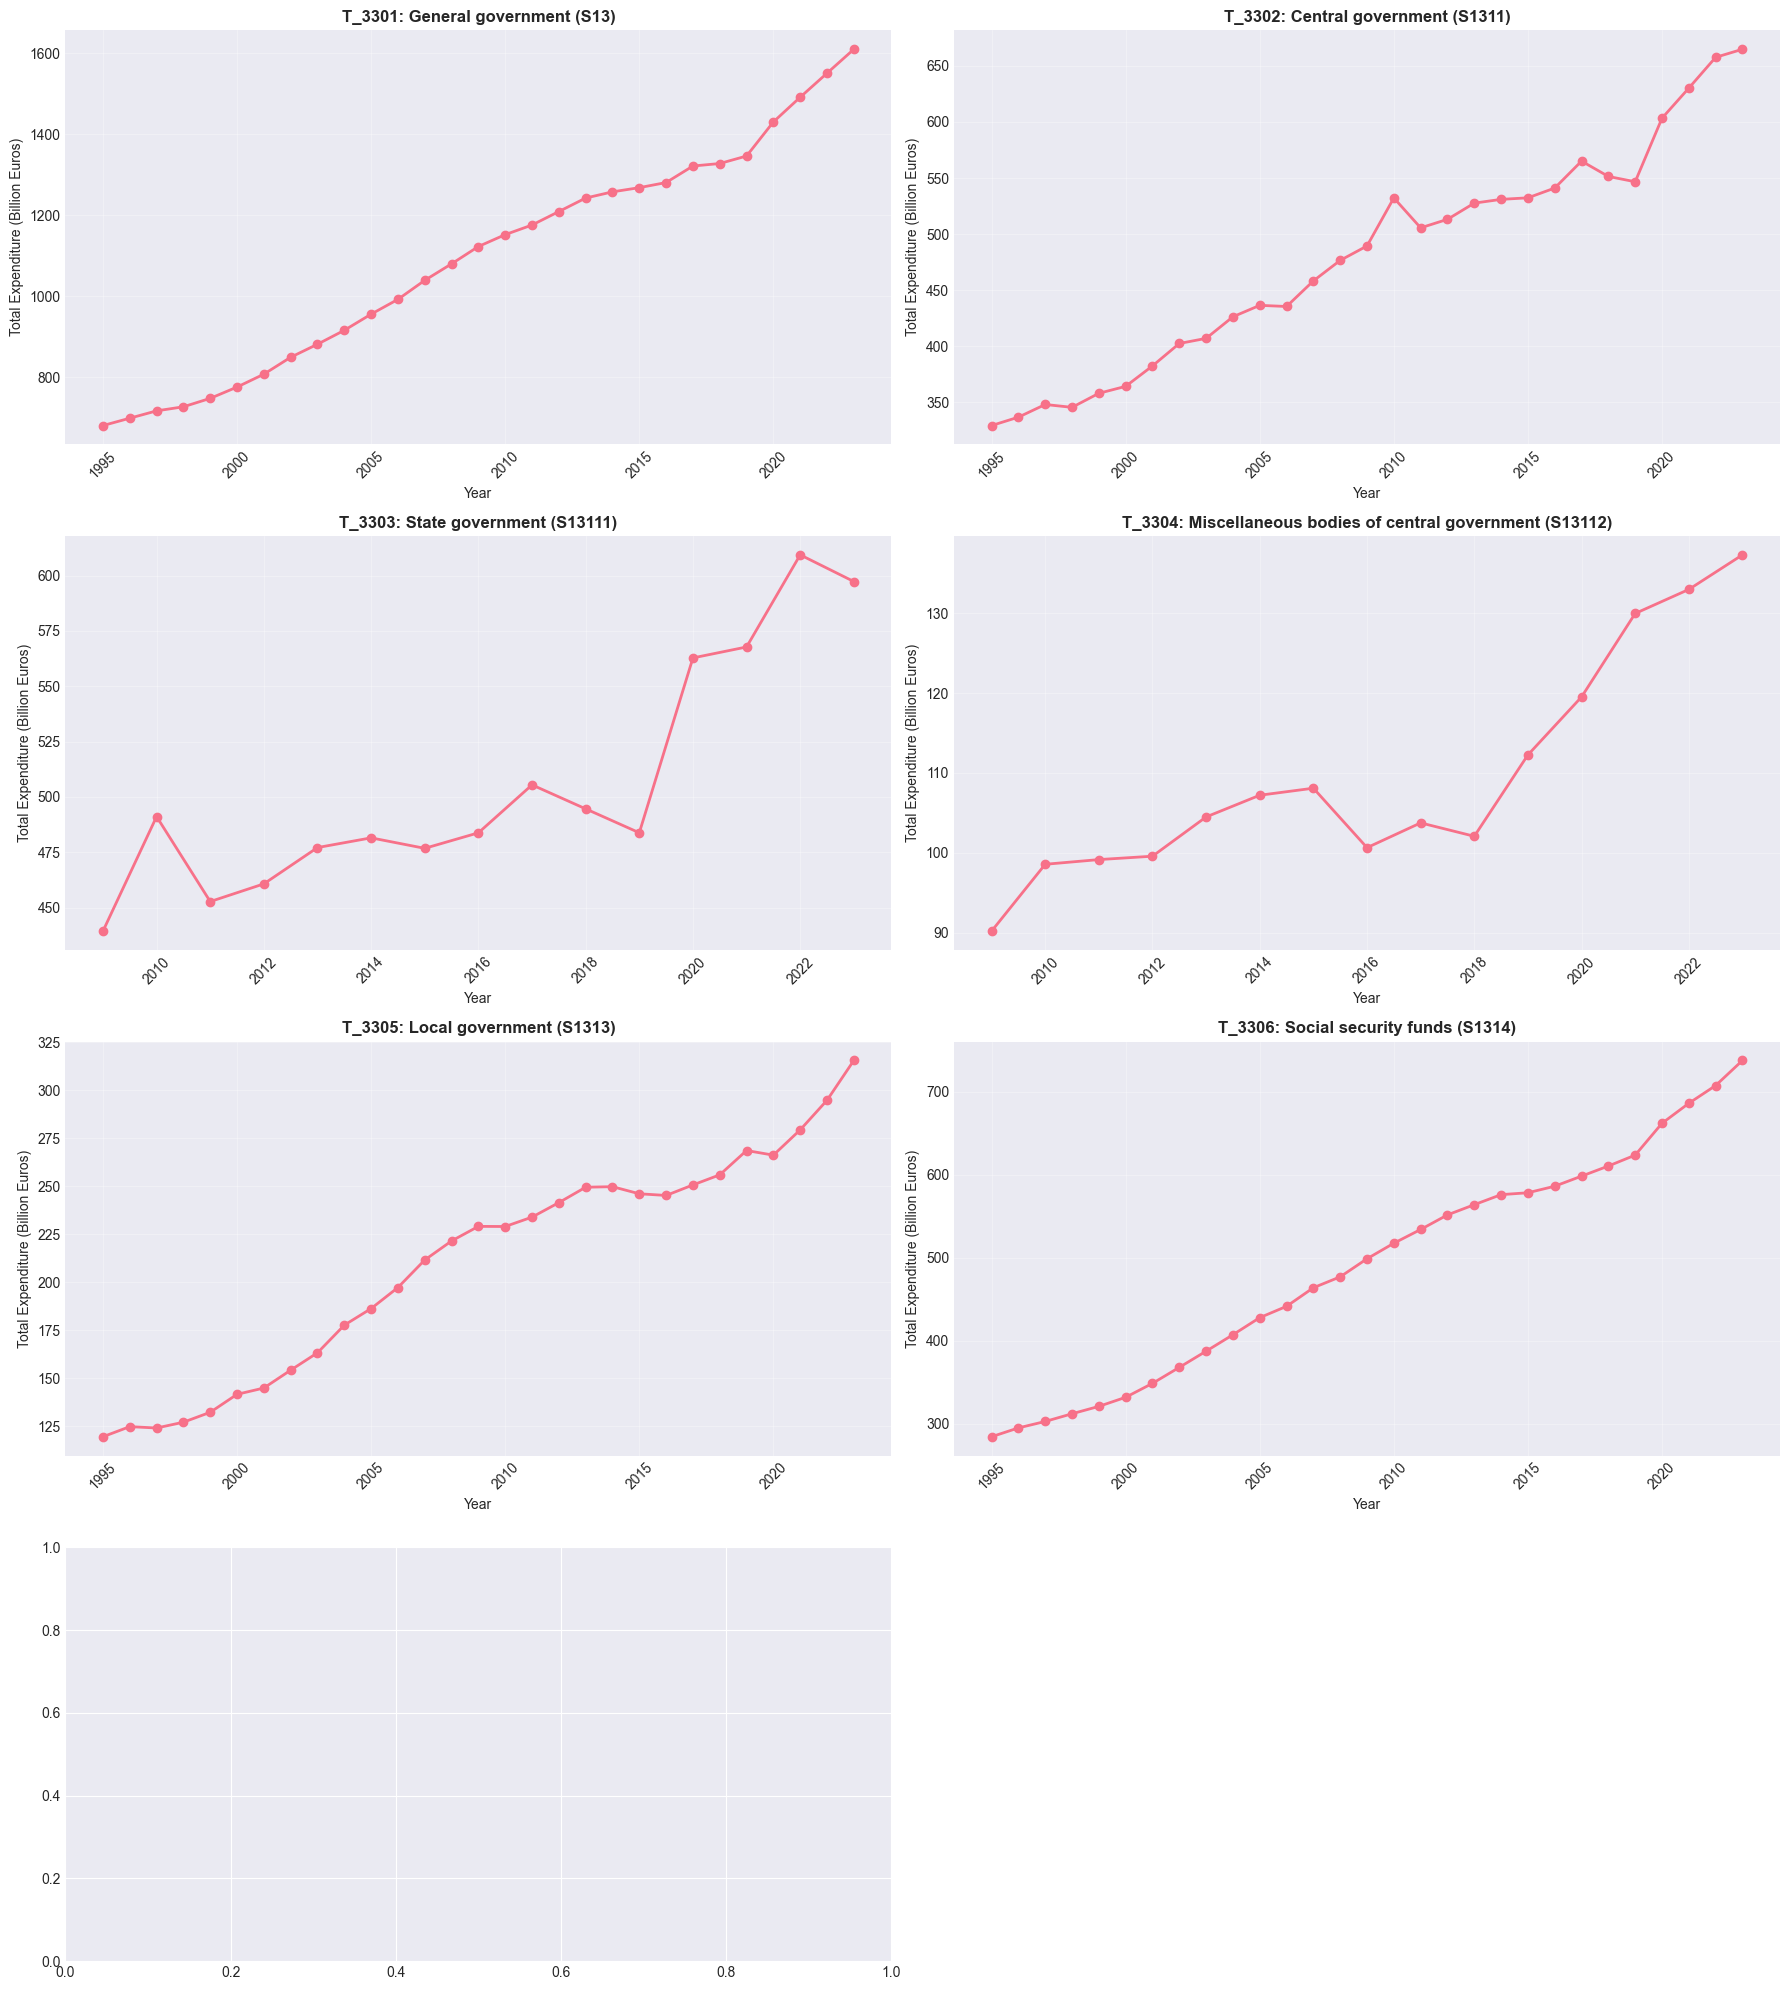

Expenditure trends visualized!


In [7]:
# Visualize total expenditure over time for all datasets
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
axes = axes.flatten()

for idx, (code, ts) in enumerate(time_series_data.items()):
    if idx < len(axes):
        ax = axes[idx]
        ax.plot(ts['Year'], ts['Total_Expenditure'], marker='o', linewidth=2, markersize=6)
        ax.set_title(f'{code}: {dataset_names[code]}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Year', fontsize=10)
        ax.set_ylabel('Total Expenditure (Billion Euros)', fontsize=10)
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=45)

# Remove empty subplot
if len(time_series_data) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.savefig('expenditure_trends.png', dpi=300, bbox_inches='tight')
plt.show()

print("Expenditure trends visualized!")


In [8]:
# Statistical summary for all datasets
print("Statistical Summary of Total Expenditure Across All Datasets")
print("="*90)

summary_stats = pd.DataFrame()
for code, ts in time_series_data.items():
    stats = ts['Total_Expenditure'].describe()
    summary_stats[dataset_names[code][:30]] = stats

summary_stats


Statistical Summary of Total Expenditure Across All Datasets


,General government (S13),Central government (S1311),State government (S13111),Miscellaneous bodies of centra,Local government (S1313),Social security funds (S1314)
count,29.000000,29.000000,15.000000,15.00000,29.000000,29.000000
mean,1091.393893,479.283690,505.638067,109.71480,209.786483,489.505690
std,275.933847,98.371657,52.754311,14.01801,57.730599,135.884207
min,680.370000,329.400000,439.432000,90.17800,119.625000,284.238000
25%,849.063000,402.529000,476.990000,100.10100,154.297000,367.793000
50%,1122.607000,489.449000,483.843000,104.48500,229.121000,498.606000
75%,1280.648000,541.055000,534.127500,115.88900,249.868000,585.987000
max,1609.882900,664.742000,609.323000,137.32200,315.611000,737.483000


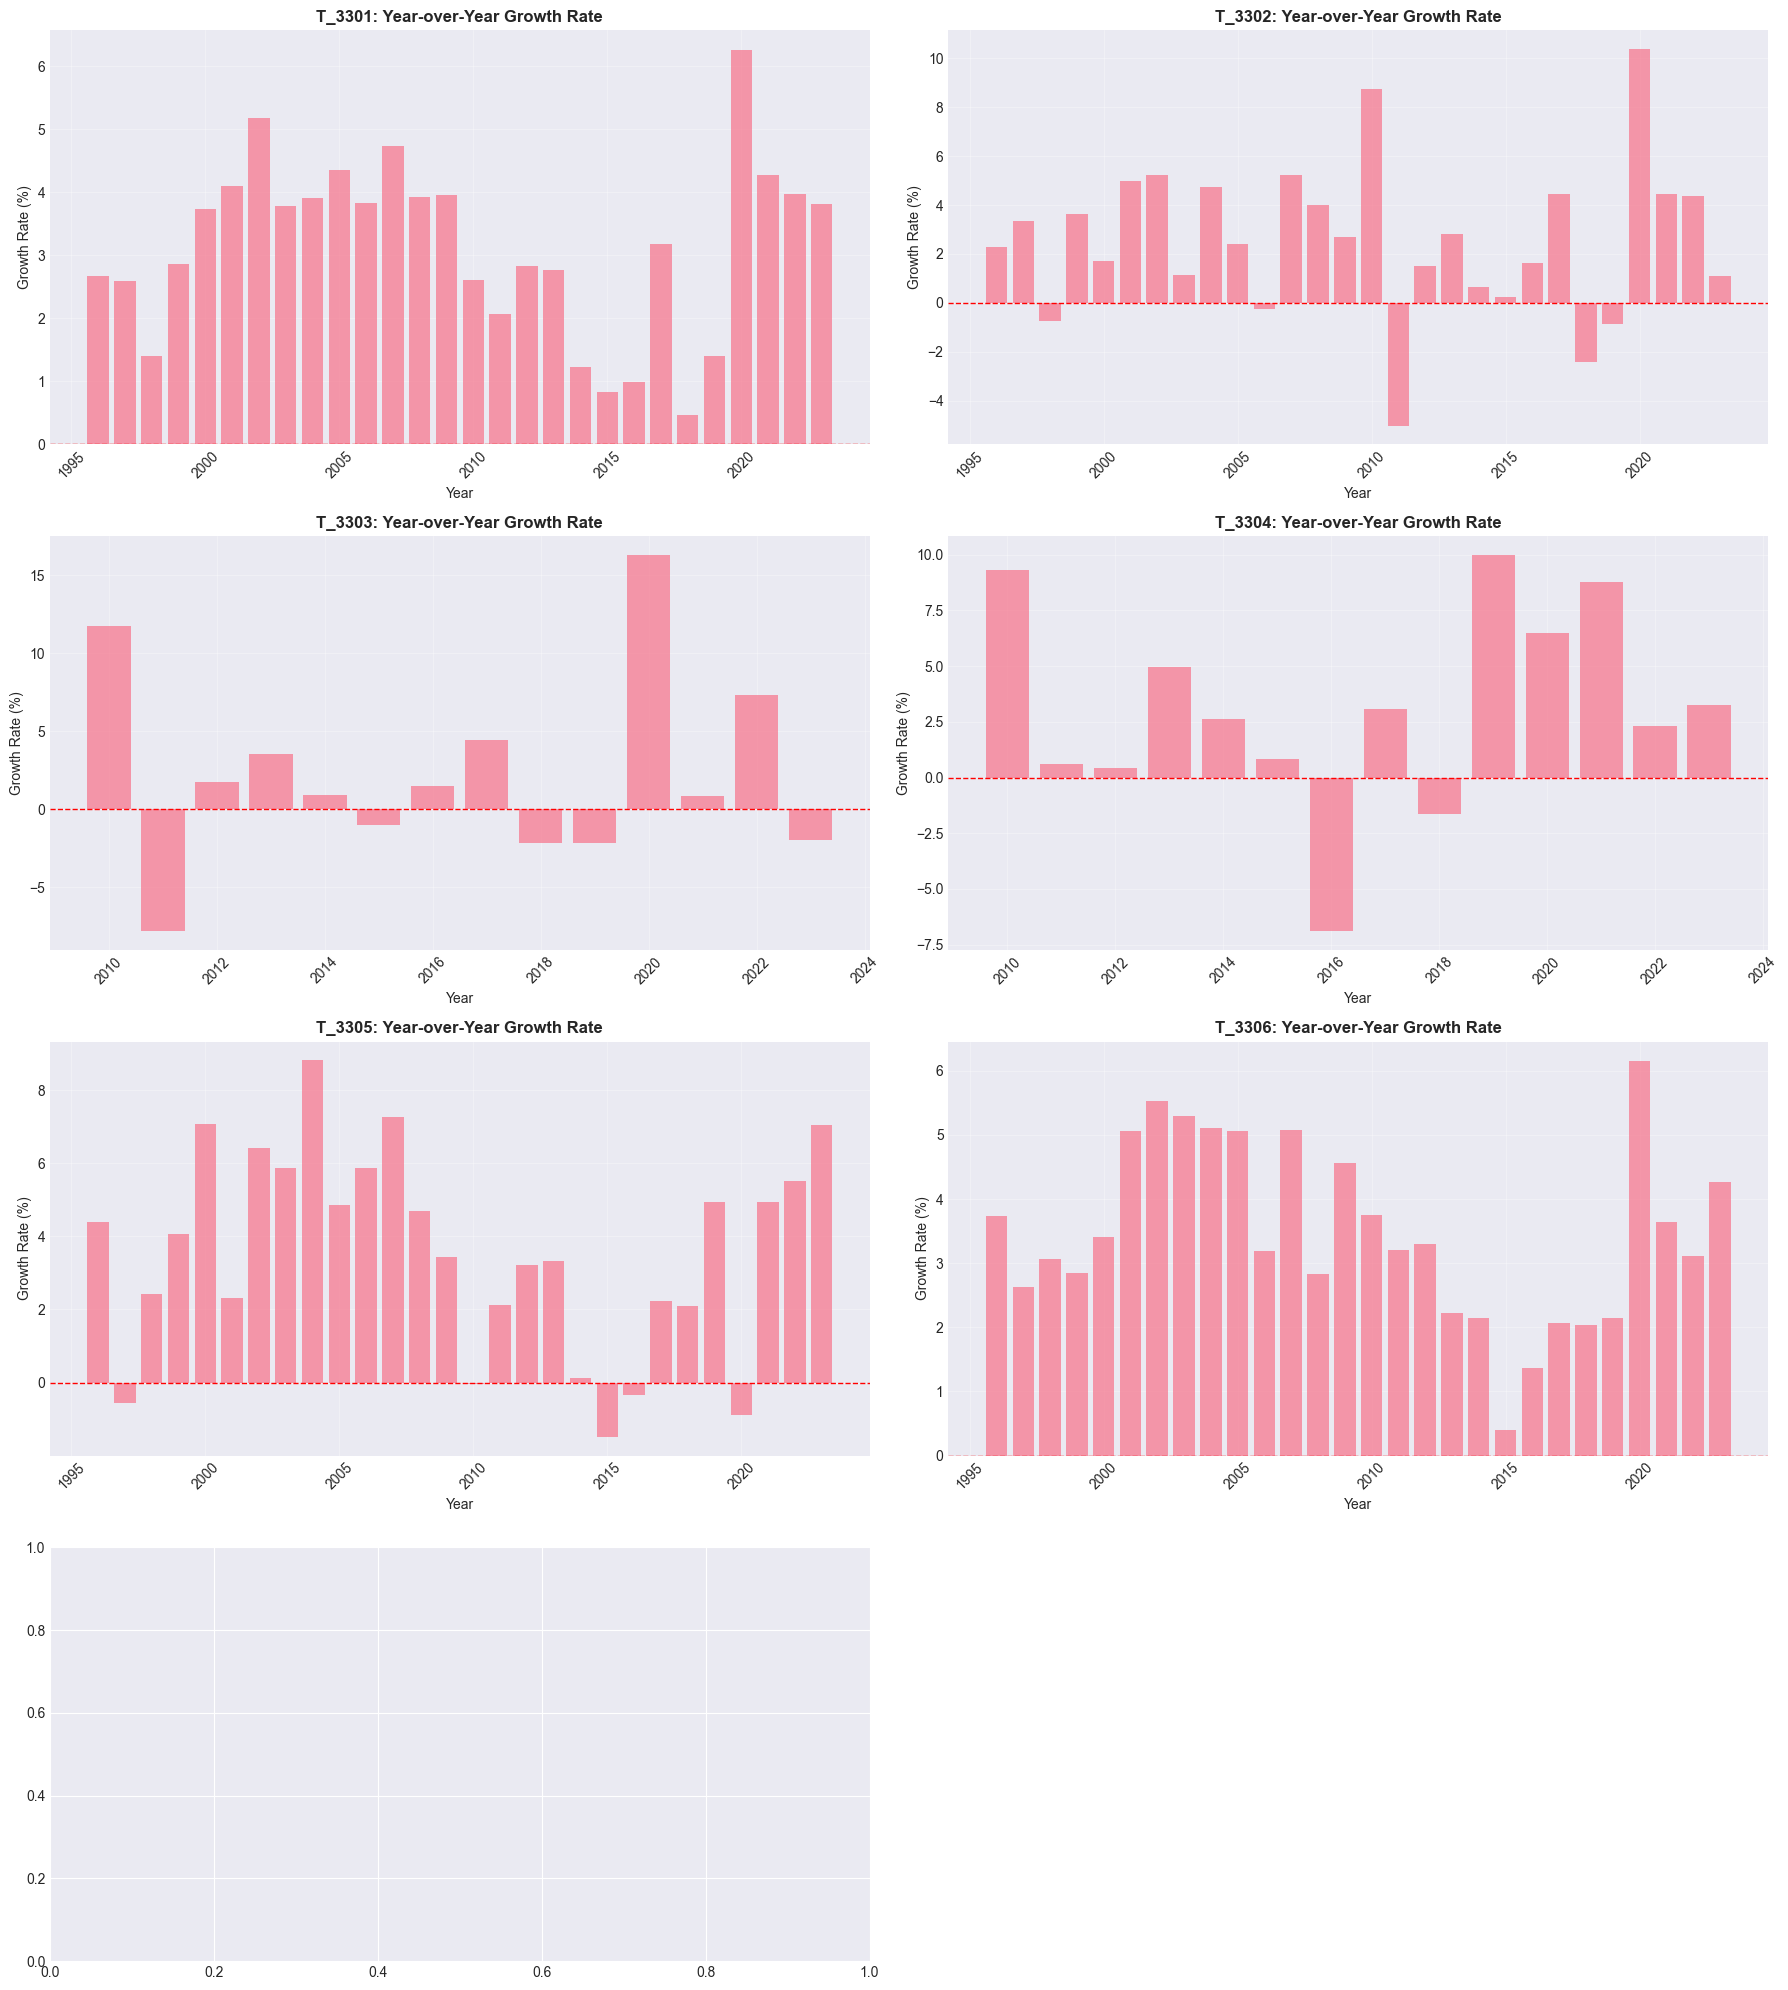

Year-over-year growth analysis completed!


In [9]:
# Year-over-year growth analysis
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
axes = axes.flatten()

for idx, (code, ts) in enumerate(time_series_data.items()):
    if idx < len(axes):
        # Calculate year-over-year growth
        ts['YoY_Growth'] = ts['Total_Expenditure'].pct_change() * 100
        
        ax = axes[idx]
        ax.bar(ts['Year'], ts['YoY_Growth'], alpha=0.7)
        ax.axhline(y=0, color='r', linestyle='--', linewidth=1)
        ax.set_title(f'{code}: Year-over-Year Growth Rate', fontsize=12, fontweight='bold')
        ax.set_xlabel('Year', fontsize=10)
        ax.set_ylabel('Growth Rate (%)', fontsize=10)
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=45)

# Remove empty subplot
if len(time_series_data) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.savefig('yoy_growth_rates.png', dpi=300, bbox_inches='tight')
plt.show()

print("Year-over-year growth analysis completed!")


## 5. Detailed Analysis by Expenditure Category


In [10]:
# Extract expenditure by category for T_3301 (General Government)
df_main = cleaned_datasets['T_3301']

# Get year columns
year_cols = [col for col in df_main.columns if isinstance(col, str) and col.isdigit() and len(col) == 4]
if not year_cols:
    year_cols = [col for col in df_main.columns if isinstance(col, (int, float)) and 1990 <= col <= 2030]

# Filter for main expenditure categories (OTE rows)
ote_data = df_main[df_main['Category_Type'] == 'OTE'].copy()

# Get unique expenditure categories
print("Expenditure Categories in T_3301:")
print("="*80)
for idx, row in ote_data.head(20).iterrows():
    code = row['Code'] if 'Code' in row and not pd.isna(row['Code']) else 'N/A'
    desc = row['Category_Description'] if 'Category_Description' in row and not pd.isna(row['Category_Description']) else 'N/A'
    print(f"- {code}: {desc}")

print(f"\nTotal categories: {len(ote_data)}")


Expenditure Categories in T_3301:
- _Z: Total government expenditure (*)
- GF01: Total government expenditure (*)
- GF0101: Total government expenditure (*)
- GF0102: Total government expenditure (*)
- GF0103: Total government expenditure (*)
- GF0104: Total government expenditure (*)
- GF0105: Total government expenditure (*)
- GF0106: Total government expenditure (*)
- GF0107: Total government expenditure (*)
- GF0108: Total government expenditure (*)
- GF02: Total government expenditure (*)
- GF0201: Total government expenditure (*)
- GF0202: Total government expenditure (*)
- GF0203: Total government expenditure (*)
- GF0204: Total government expenditure (*)
- GF0205: Total government expenditure (*)
- GF03: Total government expenditure (*)
- GF0301: Total government expenditure (*)
- GF0302: Total government expenditure (*)
- GF0303: Total government expenditure (*)

Total categories: 80


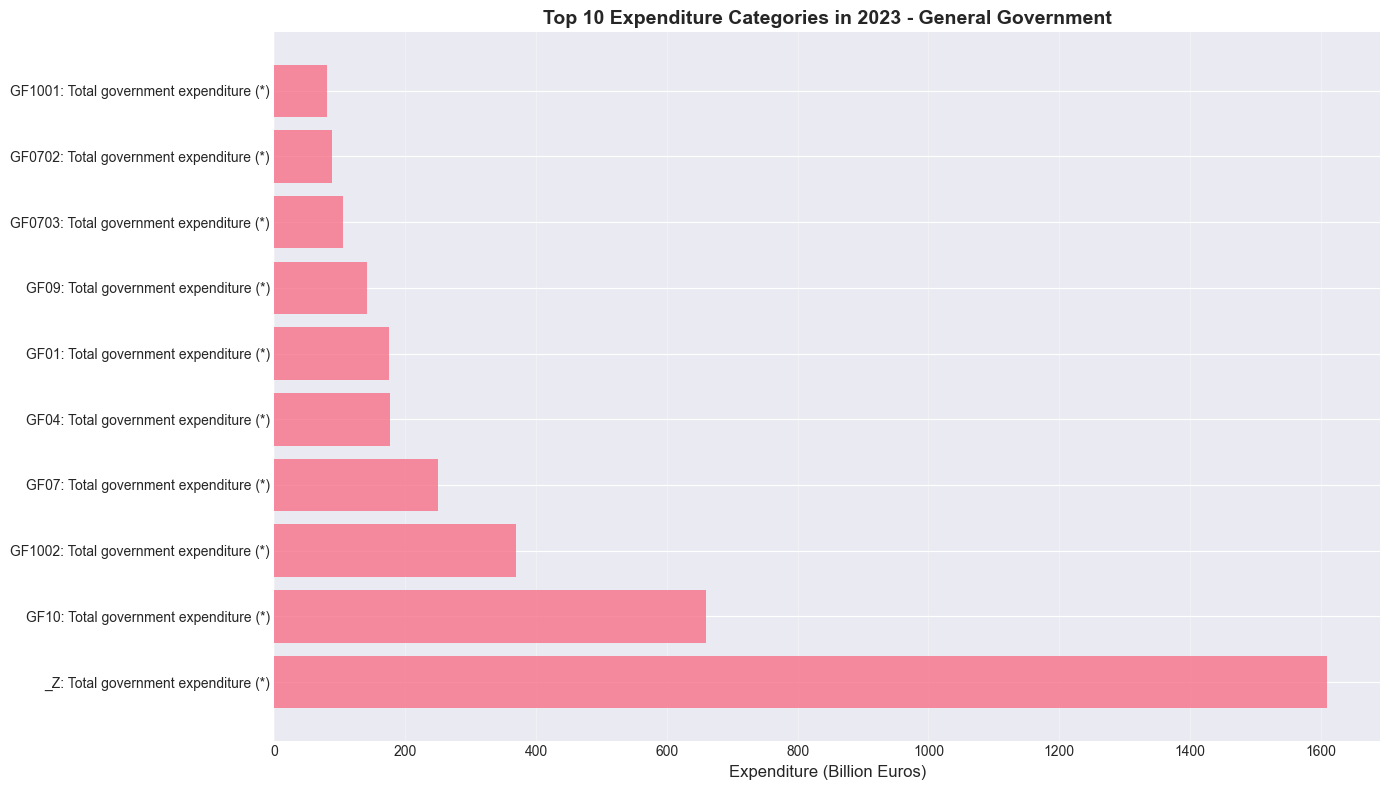

Top 10 expenditure categories for 2023 visualized!


In [11]:
# Analyze top expenditure categories over time
# Get the latest year data
latest_year = max(year_cols, key=lambda x: int(x) if isinstance(x, str) else x)

# Create dataframe for latest year expenditure
ote_latest = ote_data.copy()
ote_latest['Latest_Expenditure'] = pd.to_numeric(ote_latest[latest_year], errors='coerce')
ote_latest = ote_latest.dropna(subset=['Latest_Expenditure'])
ote_latest = ote_latest.sort_values('Latest_Expenditure', ascending=False)

# Plot top 10 categories
top_10 = ote_latest.head(10)

plt.figure(figsize=(14, 8))
plt.barh(range(len(top_10)), top_10['Latest_Expenditure'], alpha=0.8)
labels = []
for _, row in top_10.iterrows():
    code = row['Code'] if not pd.isna(row['Code']) else 'N/A'
    desc = row['Category_Description'] if not pd.isna(row['Category_Description']) else 'Unknown'
    labels.append(f"{code}: {str(desc)[:40]}")
plt.yticks(range(len(top_10)), labels)
plt.xlabel('Expenditure (Billion Euros)', fontsize=12)
plt.title(f'Top 10 Expenditure Categories in {latest_year} - General Government', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('top_10_categories.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Top 10 expenditure categories for {latest_year} visualized!")


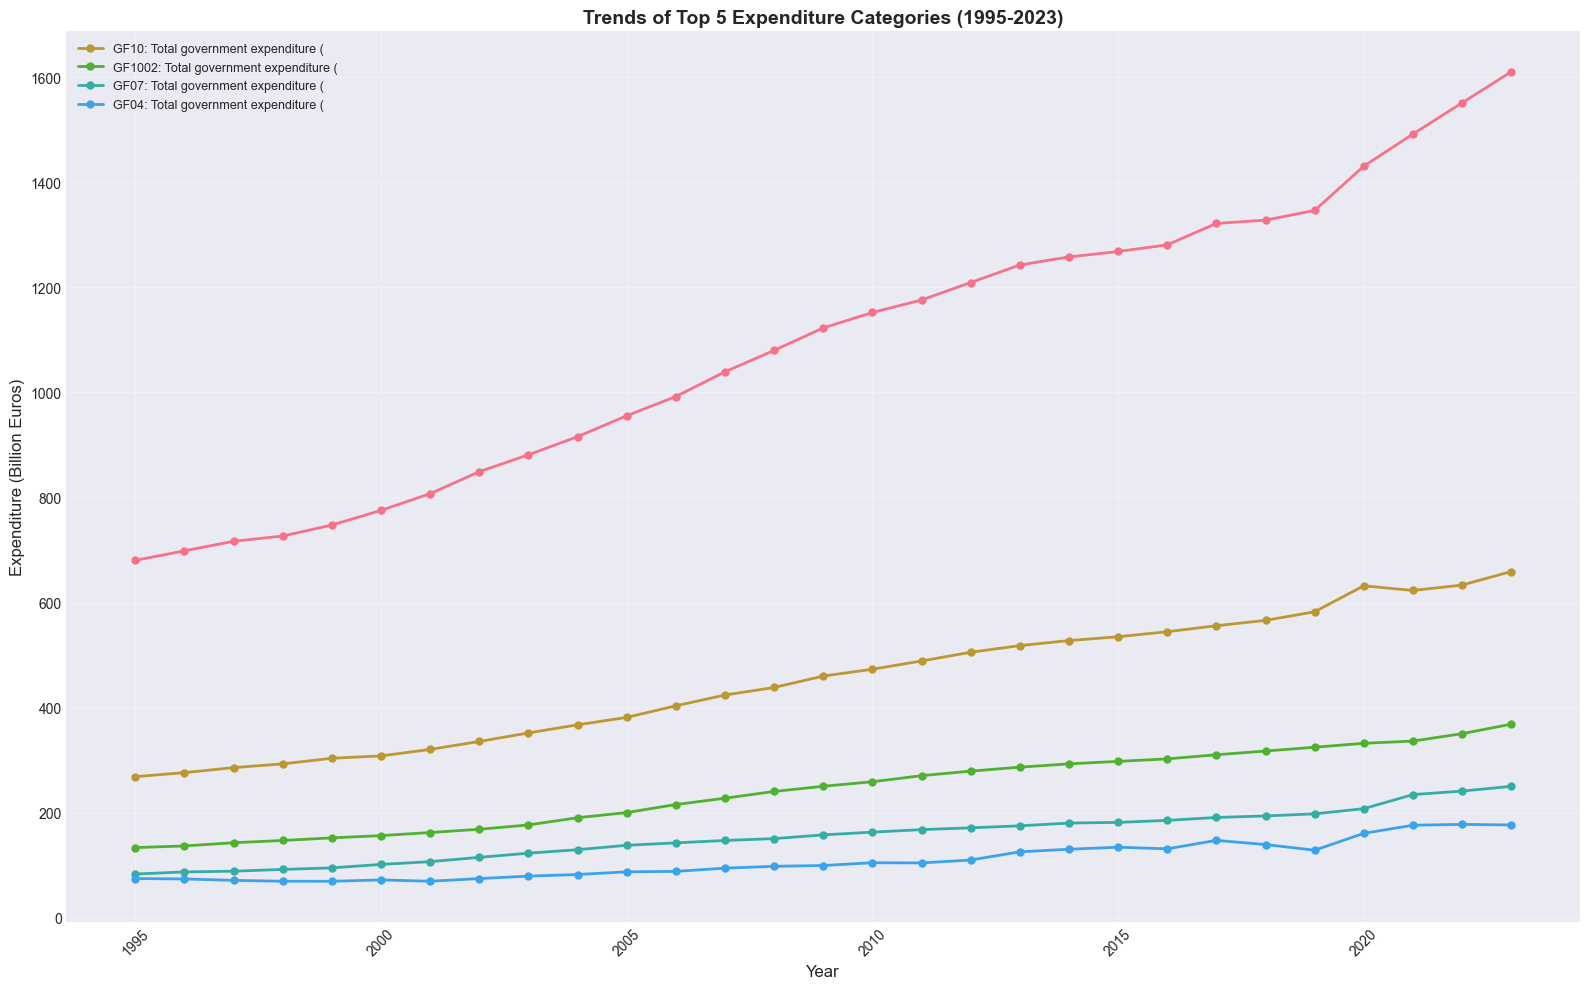

Major categories trends visualized!


In [12]:
# Analyze trends for major categories
major_categories = top_10['Code'].head(5).tolist()

plt.figure(figsize=(16, 10))

for code in major_categories:
    if not pd.isna(code):
        category_row = ote_data[ote_data['Code'] == code].iloc[0]
        values = [float(category_row[year]) if not pd.isna(category_row[year]) else np.nan for year in year_cols]
        years = [int(year) if isinstance(year, str) else year for year in year_cols]
        
        desc = category_row['Category_Description'] if not pd.isna(category_row['Category_Description']) else 'Unknown'
        label = f"{code}: {str(desc)[:30]}"
        plt.plot(years, values, marker='o', linewidth=2, markersize=5, label=label)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Expenditure (Billion Euros)', fontsize=12)
plt.title('Trends of Top 5 Expenditure Categories (1995-2023)', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=9)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('major_categories_trends.png', dpi=300, bbox_inches='tight')
plt.show()

print("Major categories trends visualized!")


## 6. Correlation Analysis


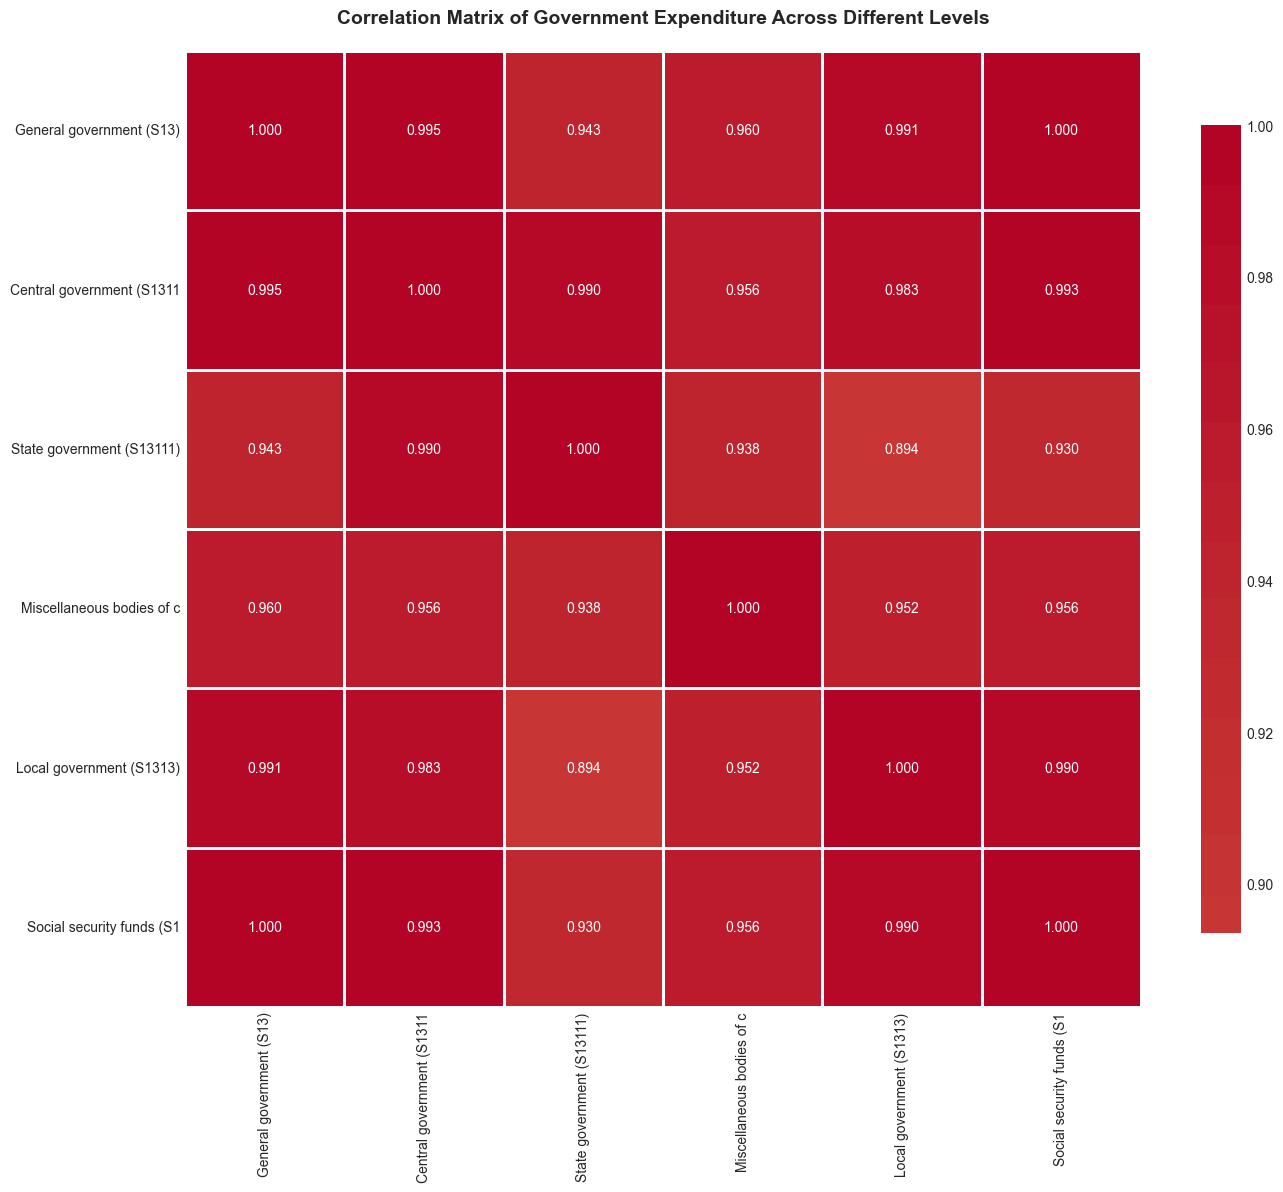

Correlation analysis completed!


In [13]:
# Create correlation matrix between different government levels
# First, merge all datasets on Year to handle different lengths
correlation_data = []

# Start with years from the first dataset
first_code = list(time_series_data.keys())[0]
years_base = time_series_data[first_code][['Year']].copy()

# Merge all datasets
merged_df = years_base
for code, ts in time_series_data.items():
    col_name = dataset_names[code][:25]
    ts_copy = ts[['Year', 'Total_Expenditure']].copy()
    ts_copy = ts_copy.rename(columns={'Total_Expenditure': col_name})
    merged_df = pd.merge(merged_df, ts_copy, on='Year', how='outer')

# Sort by year and set as index
merged_df = merged_df.sort_values('Year').set_index('Year')

# Calculate correlation matrix
corr_matrix = merged_df.corr()

# Visualize correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Government Expenditure Across Different Levels', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("Correlation analysis completed!")


## 7. Time Series Predictions - Linear Regression


In [14]:
# Function to prepare data for prediction
def prepare_prediction_data(ts_df, test_size=0.2):
    """
    Prepare time series data for prediction models
    """
    df = ts_df.copy().dropna()
    
    # Create features
    X = df['Year'].values.reshape(-1, 1)
    y = df['Total_Expenditure'].values
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
    
    return X_train, X_test, y_train, y_test, X, y

# Train models for each dataset
models_results = {}

for code, ts in time_series_data.items():
    print(f"\nTraining models for {code}: {dataset_names[code]}")
    print("="*80)
    
    X_train, X_test, y_train, y_test, X_full, y_full = prepare_prediction_data(ts)
    
    # Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    lr_pred = lr_model.predict(X_test)
    
    # Calculate metrics
    lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
    lr_mae = mean_absolute_error(y_test, lr_pred)
    lr_r2 = r2_score(y_test, lr_pred)
    
    models_results[code] = {
        'model': lr_model,
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'predictions': lr_pred,
        'rmse': lr_rmse,
        'mae': lr_mae,
        'r2': lr_r2
    }
    
    print(f"Linear Regression Results:")
    print(f"  RMSE: {lr_rmse:.2f}")
    print(f"  MAE:  {lr_mae:.2f}")
    print(f"  R²:   {lr_r2:.4f}")

print("\nAll models trained successfully!")



Training models for T_3301: General government (S13)
Linear Regression Results:
  RMSE: 48.15
  MAE:  42.68
  R²:   0.7793

Training models for T_3302: Central government (S1311)
Linear Regression Results:
  RMSE: 28.60
  MAE:  24.86
  R²:   0.6268

Training models for T_3303: State government (S13111)
Linear Regression Results:
  RMSE: 63.96
  MAE:  62.27
  R²:   -12.3986

Training models for T_3304: Miscellaneous bodies of central government (S13112)
Linear Regression Results:
  RMSE: 18.53
  MAE:  18.43
  R²:   -36.7764

Training models for T_3305: Local government (S1313)
Linear Regression Results:
  RMSE: 17.75
  MAE:  16.03
  R²:   0.2056

Training models for T_3306: Social security funds (S1314)
Linear Regression Results:
  RMSE: 17.87
  MAE:  15.14
  R²:   0.8401

All models trained successfully!


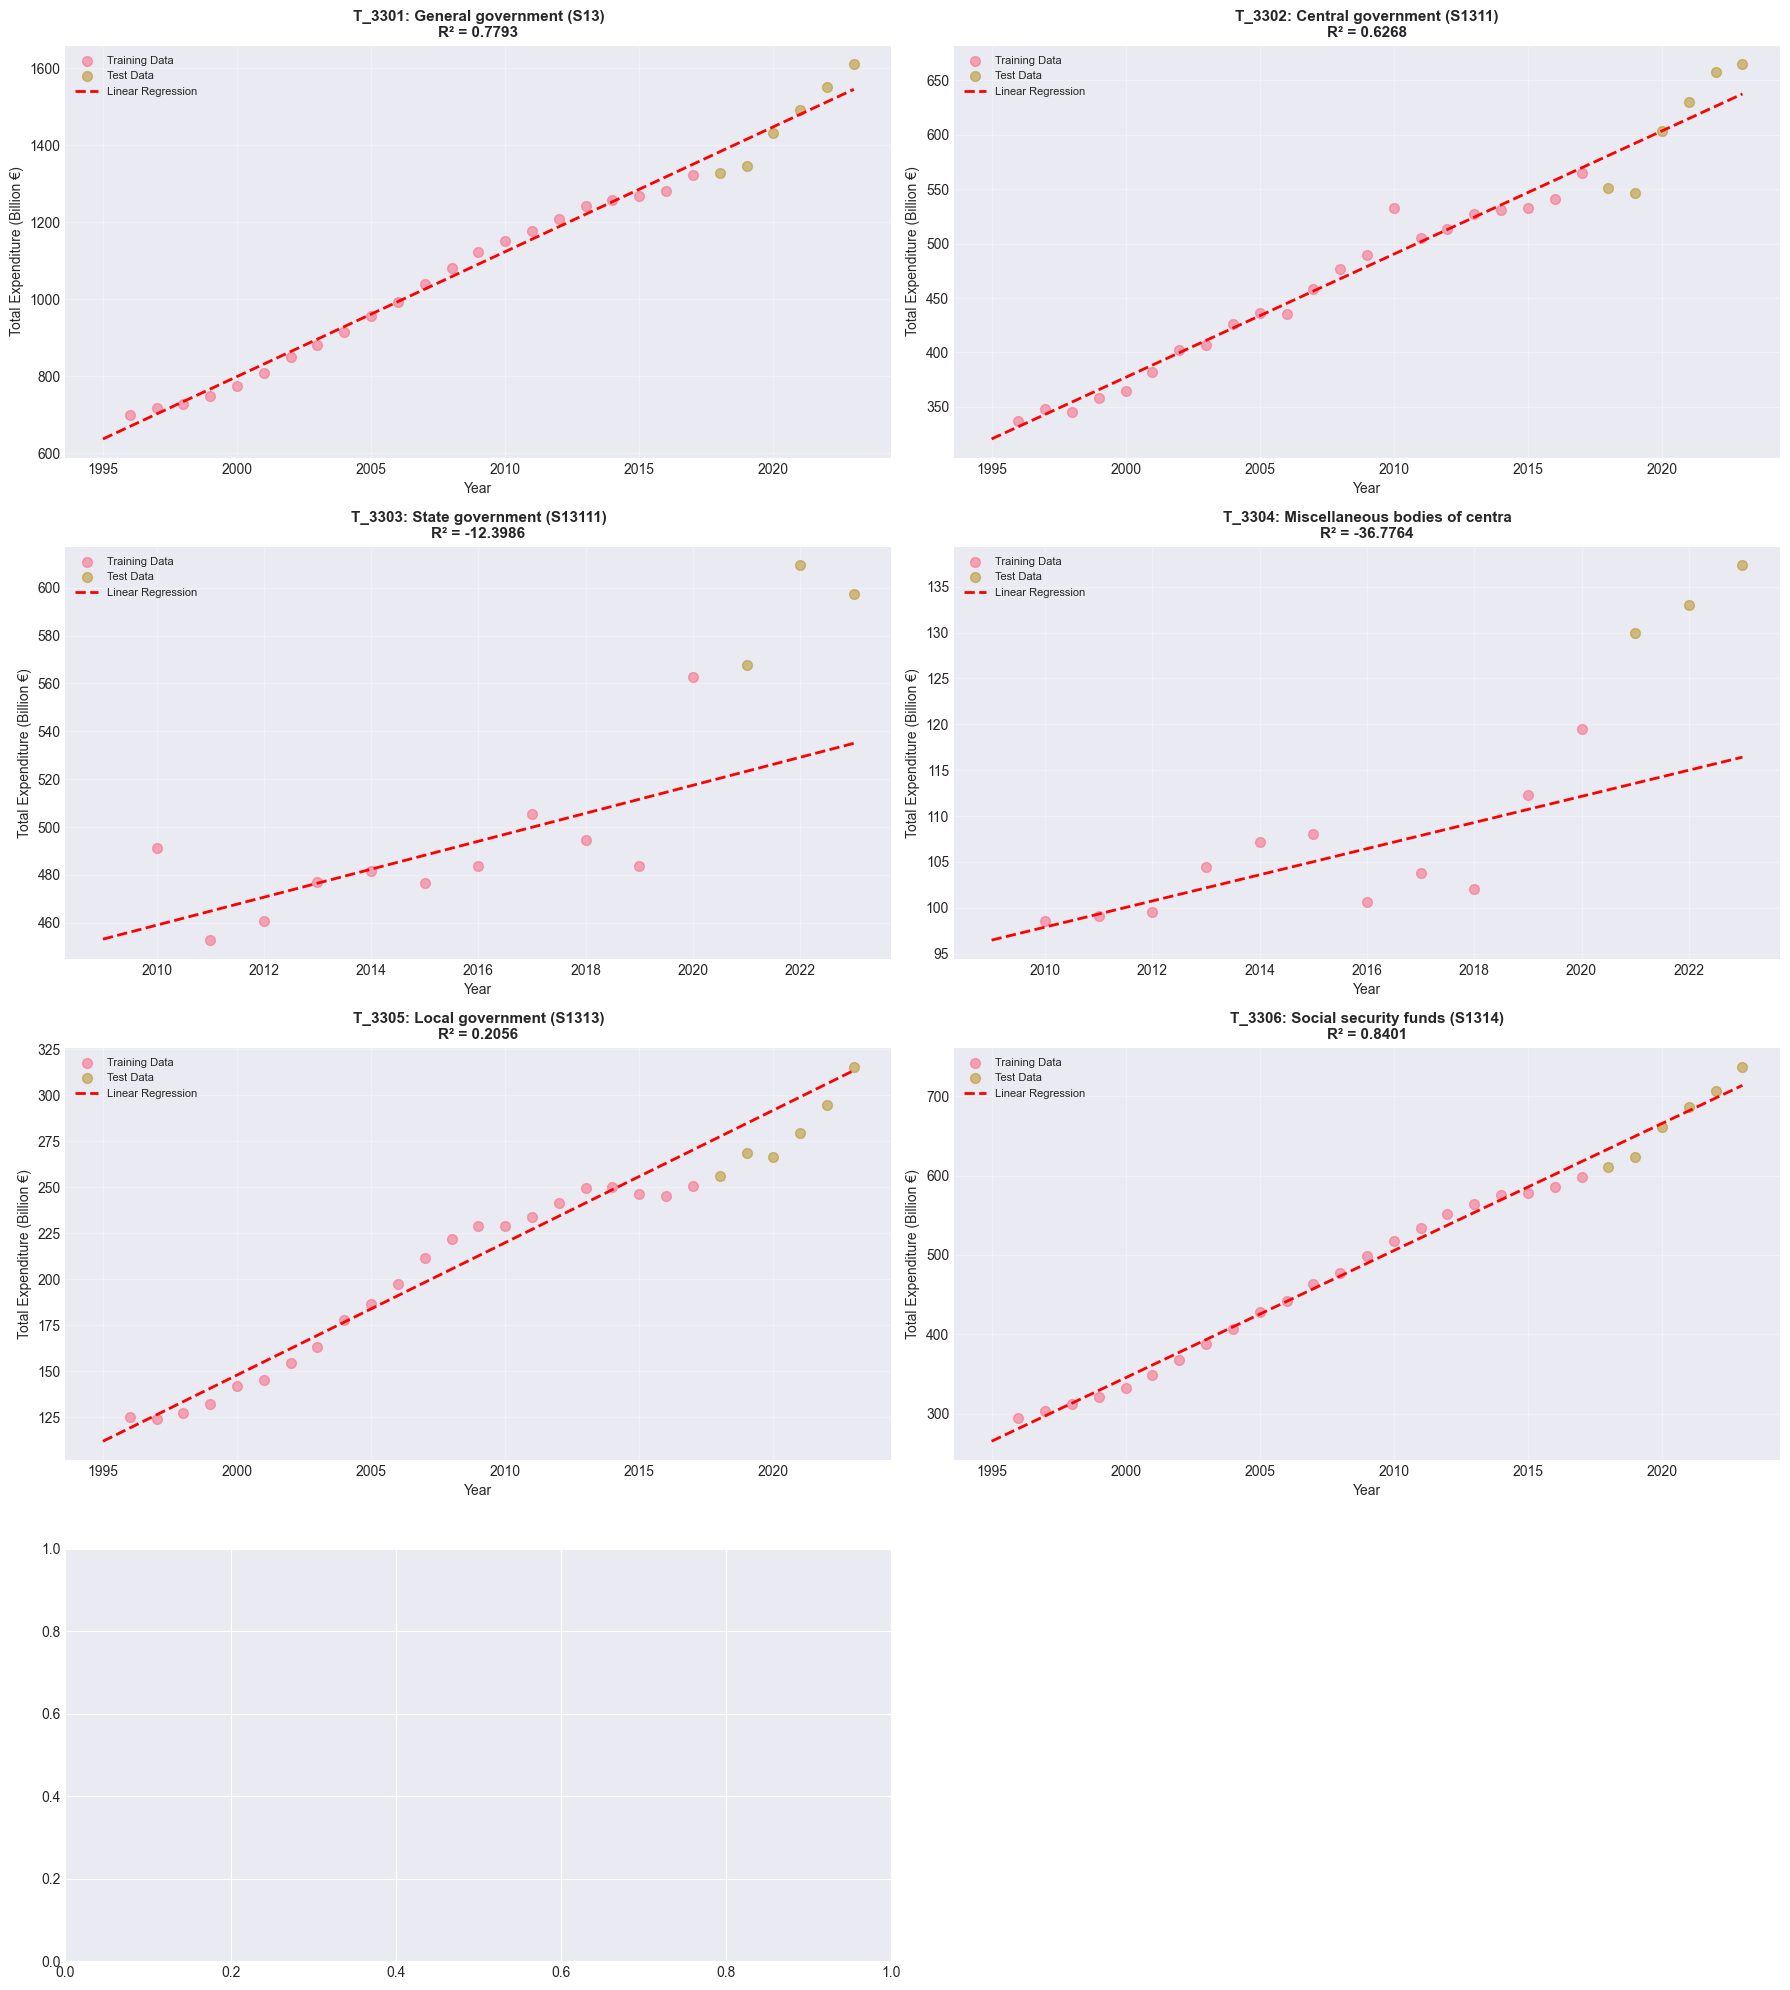

Predictions visualized for all datasets!


In [15]:
# Visualize predictions for all datasets
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
axes = axes.flatten()

for idx, (code, results) in enumerate(models_results.items()):
    if idx < len(axes):
        ax = axes[idx]
        
        ts = time_series_data[code]
        
        # Plot actual data
        ax.scatter(results['X_train'], results['y_train'], alpha=0.6, label='Training Data', s=50)
        ax.scatter(results['X_test'], results['y_test'], alpha=0.6, label='Test Data', s=50)
        
        # Plot predictions
        X_full = ts['Year'].values.reshape(-1, 1)
        y_pred_full = results['model'].predict(X_full)
        ax.plot(X_full, y_pred_full, 'r--', linewidth=2, label='Linear Regression')
        
        ax.set_title(f'{code}: {dataset_names[code][:30]}\nR² = {results["r2"]:.4f}', 
                    fontsize=11, fontweight='bold')
        ax.set_xlabel('Year', fontsize=10)
        ax.set_ylabel('Total Expenditure (Billion €)', fontsize=10)
        ax.legend(loc='best', fontsize=8)
        ax.grid(True, alpha=0.3)

# Remove empty subplot
if len(models_results) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.savefig('predictions_all_datasets.png', dpi=300, bbox_inches='tight')
plt.show()

print("Predictions visualized for all datasets!")


## 8. Future Predictions (2024-2030)


In [16]:
# Generate future predictions
future_years = np.arange(2024, 2031).reshape(-1, 1)

future_predictions = {}

for code, results in models_results.items():
    future_pred = results['model'].predict(future_years)
    future_predictions[code] = future_pred
    
    print(f"\n{code}: {dataset_names[code]}")
    print("-" * 80)
    for year, pred in zip(future_years.flatten(), future_pred):
        print(f"  {year}: {pred:.2f} Billion Euros")

print("\nFuture predictions generated!")



T_3301: General government (S13)
--------------------------------------------------------------------------------
  2024: 1577.21 Billion Euros
  2025: 1609.63 Billion Euros
  2026: 1642.06 Billion Euros
  2027: 1674.49 Billion Euros
  2028: 1706.92 Billion Euros
  2029: 1739.35 Billion Euros
  2030: 1771.77 Billion Euros

T_3302: Central government (S1311)
--------------------------------------------------------------------------------
  2024: 648.82 Billion Euros
  2025: 660.14 Billion Euros
  2026: 671.45 Billion Euros
  2027: 682.77 Billion Euros
  2028: 694.09 Billion Euros
  2029: 705.41 Billion Euros
  2030: 716.73 Billion Euros

T_3303: State government (S13111)
--------------------------------------------------------------------------------
  2024: 540.86 Billion Euros
  2025: 546.70 Billion Euros
  2026: 552.55 Billion Euros
  2027: 558.39 Billion Euros
  2028: 564.24 Billion Euros
  2029: 570.08 Billion Euros
  2030: 575.93 Billion Euros

T_3304: Miscellaneous bodies of cen

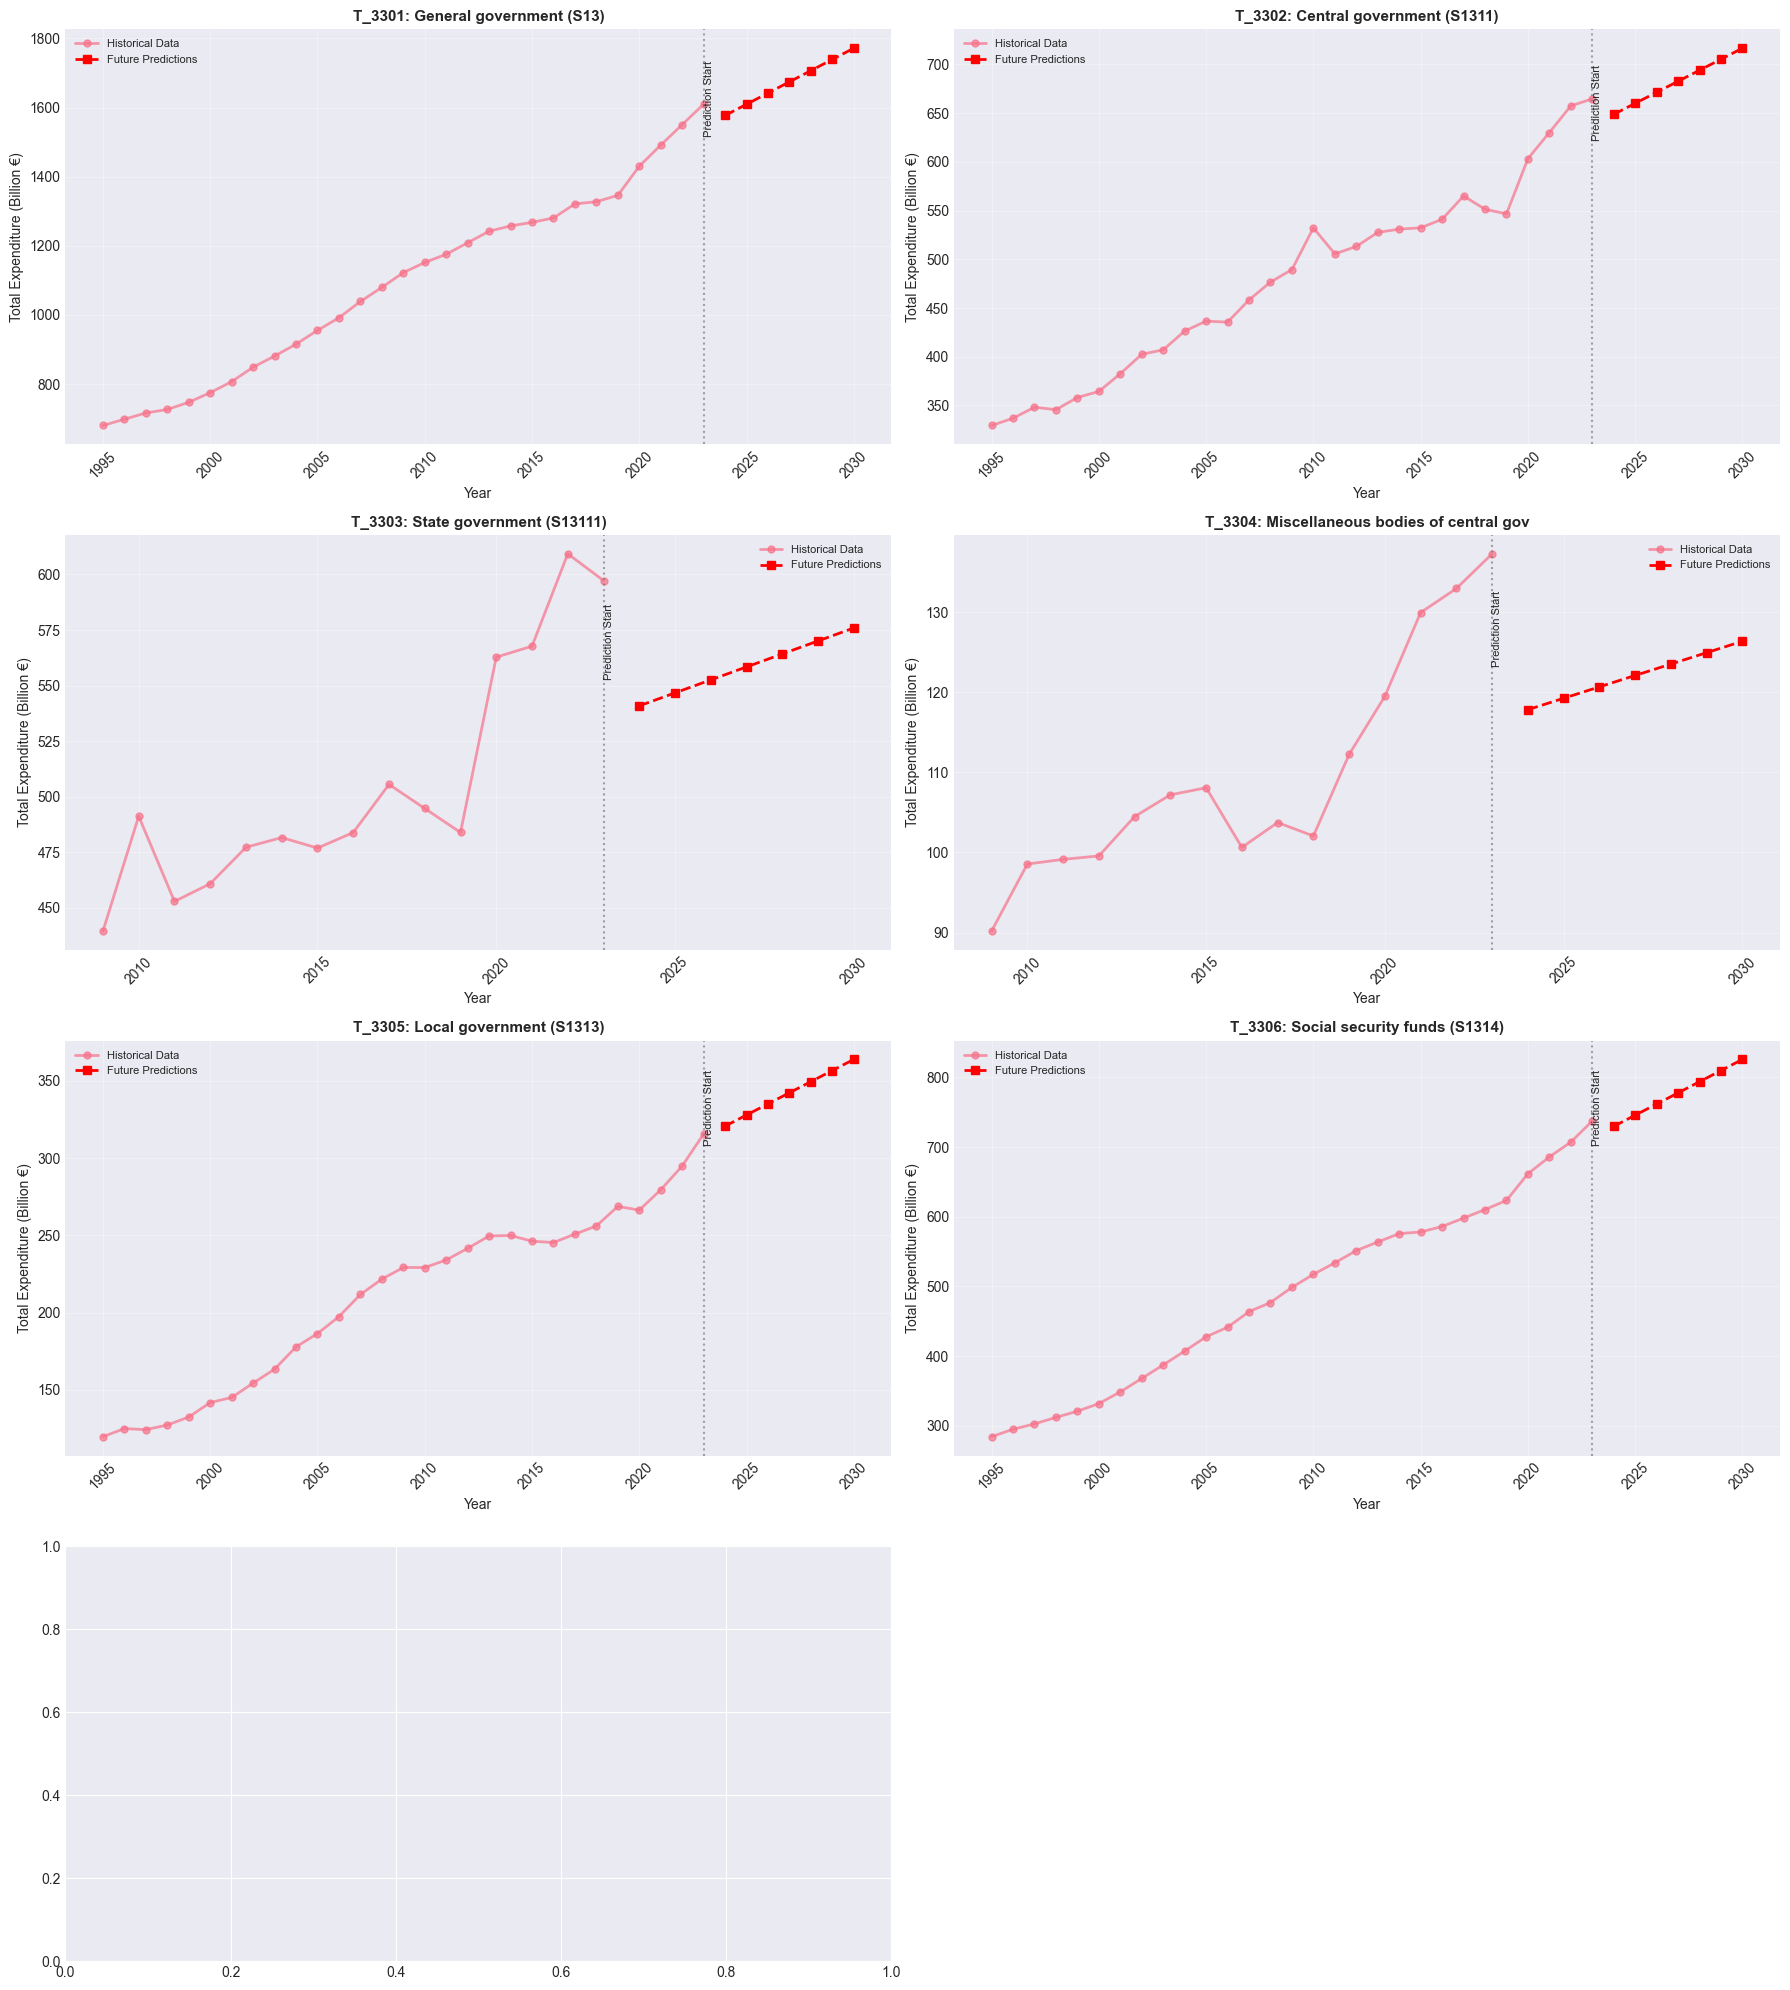

Future predictions visualized!


In [17]:
# Visualize future predictions
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
axes = axes.flatten()

for idx, (code, results) in enumerate(models_results.items()):
    if idx < len(axes):
        ax = axes[idx]
        ts = time_series_data[code]
        
        # Plot historical data
        ax.plot(ts['Year'], ts['Total_Expenditure'], 'o-', linewidth=2, 
               label='Historical Data', markersize=5, alpha=0.7)
        
        # Plot future predictions
        ax.plot(future_years, future_predictions[code], 's--', linewidth=2, 
               label='Future Predictions', markersize=6, color='red')
        
        ax.axvline(x=2023, color='gray', linestyle=':', linewidth=1.5, alpha=0.7)
        ax.text(2023, ax.get_ylim()[1]*0.95, 'Prediction Start', 
               rotation=90, verticalalignment='top', fontsize=8)
        
        ax.set_title(f'{code}: {dataset_names[code][:35]}', 
                    fontsize=11, fontweight='bold')
        ax.set_xlabel('Year', fontsize=10)
        ax.set_ylabel('Total Expenditure (Billion €)', fontsize=10)
        ax.legend(loc='best', fontsize=8)
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=45)

# Remove empty subplot
if len(models_results) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.savefig('future_predictions_2024_2030.png', dpi=300, bbox_inches='tight')
plt.show()

print("Future predictions visualized!")


## 9. Advanced Models - Polynomial Regression


In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Train polynomial regression models
poly_results = {}

for code, ts in time_series_data.items():
    X_train, X_test, y_train, y_test, X_full, y_full = prepare_prediction_data(ts)
    
    # Polynomial Regression (degree 2)
    poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
    poly_model.fit(X_train, y_train)
    poly_pred = poly_model.predict(X_test)
    
    # Calculate metrics
    poly_rmse = np.sqrt(mean_squared_error(y_test, poly_pred))
    poly_mae = mean_absolute_error(y_test, poly_pred)
    poly_r2 = r2_score(y_test, poly_pred)
    
    poly_results[code] = {
        'model': poly_model,
        'predictions': poly_pred,
        'rmse': poly_rmse,
        'mae': poly_mae,
        'r2': poly_r2
    }
    
print("Polynomial regression models trained!")
print("\nModel Comparison:")
print("="*100)
print(f"{'Dataset':<15} {'Linear R²':<12} {'Poly R²':<12} {'Linear RMSE':<15} {'Poly RMSE':<15}")
print("="*100)

for code in models_results.keys():
    lr_r2 = models_results[code]['r2']
    poly_r2 = poly_results[code]['r2']
    lr_rmse = models_results[code]['rmse']
    poly_rmse = poly_results[code]['rmse']
    
    print(f"{code:<15} {lr_r2:<12.4f} {poly_r2:<12.4f} {lr_rmse:<15.2f} {poly_rmse:<15.2f}")


Polynomial regression models trained!

Model Comparison:
Dataset         Linear R²    Poly R²      Linear RMSE     Poly RMSE      
T_3301          0.7793       0.6760       48.15           58.35          
T_3302          0.6268       0.3286       28.60           38.36          
T_3303          -12.3986     -0.1244      63.96           18.53          
T_3304          -36.7764     -15.1060     18.53           12.10          
T_3305          0.2056       0.0518       17.75           19.39          
T_3306          0.8401       0.7292       17.87           23.26          


## 10. Ensemble Methods - Random Forest & Gradient Boosting


In [19]:
# Train ensemble models
ensemble_results = {}

for code, ts in time_series_data.items():
    print(f"\nTraining ensemble models for {code}...")
    
    X_train, X_test, y_train, y_test, X_full, y_full = prepare_prediction_data(ts)
    
    # Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    rf_r2 = r2_score(y_test, rf_pred)
    rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
    
    # Gradient Boosting
    gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=3)
    gb_model.fit(X_train, y_train)
    gb_pred = gb_model.predict(X_test)
    gb_r2 = r2_score(y_test, gb_pred)
    gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
    
    ensemble_results[code] = {
        'rf_model': rf_model,
        'gb_model': gb_model,
        'rf_pred': rf_pred,
        'gb_pred': gb_pred,
        'rf_r2': rf_r2,
        'gb_r2': gb_r2,
        'rf_rmse': rf_rmse,
        'gb_rmse': gb_rmse
    }

print("\n" + "="*100)
print("Ensemble Models Performance Comparison")
print("="*100)
print(f"{'Dataset':<15} {'RF R²':<12} {'GB R²':<12} {'RF RMSE':<15} {'GB RMSE':<15}")
print("="*100)

for code in ensemble_results.keys():
    print(f"{code:<15} {ensemble_results[code]['rf_r2']:<12.4f} {ensemble_results[code]['gb_r2']:<12.4f} "
          f"{ensemble_results[code]['rf_rmse']:<15.2f} {ensemble_results[code]['gb_rmse']:<15.2f}")



Training ensemble models for T_3301...



Training ensemble models for T_3302...



Training ensemble models for T_3303...



Training ensemble models for T_3304...



Training ensemble models for T_3305...



Training ensemble models for T_3306...



Ensemble Models Performance Comparison
Dataset         RF R²        GB R²        RF RMSE         GB RMSE        
T_3301          -2.5219      -1.8107      192.37          171.85         
T_3302          -1.5246      -0.8812      74.38           64.21          
T_3303          -10.2288     -2.6915      58.55           33.57          
T_3304          -34.2583     -21.3026     17.90           14.24          
T_3305          -2.5754      -2.1782      37.66           35.50          
T_3306          -3.3130      -2.6611      92.82           85.51          


## 11. Comprehensive Model Comparison


In [20]:
# Create comprehensive comparison dataframe
comparison_data = []

for code in models_results.keys():
    comparison_data.append({
        'Dataset': code,
        'Description': dataset_names[code][:30],
        'Linear_R2': models_results[code]['r2'],
        'Linear_RMSE': models_results[code]['rmse'],
        'Poly_R2': poly_results[code]['r2'],
        'Poly_RMSE': poly_results[code]['rmse'],
        'RF_R2': ensemble_results[code]['rf_r2'],
        'RF_RMSE': ensemble_results[code]['rf_rmse'],
        'GB_R2': ensemble_results[code]['gb_r2'],
        'GB_RMSE': ensemble_results[code]['gb_rmse']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df


,Dataset,Description,Linear_R2,Linear_RMSE,Poly_R2,Poly_RMSE,RF_R2,RF_RMSE,GB_R2,GB_RMSE
0,T_3301,General government (S13),0.779311,48.154845,0.675954,58.351600,-2.521893,192.370055,-1.810703,171.852908
1,T_3302,Central government (S1311),0.626824,28.597288,0.328598,38.358282,-1.524633,74.381841,-0.881180,64.207097
2,T_3303,State government (S13111),-12.398641,63.962191,-0.124427,18.529283,-10.228784,58.554372,-2.691479,33.573233
3,T_3304,Miscellaneous bodies of centra,-36.776405,18.526793,-15.106026,12.097180,-34.258300,17.898664,-21.302605,14.235337
4,T_3305,Local government (S1313),0.205574,17.750644,0.051830,19.392356,-2.575362,37.657151,-2.178194,35.504031
5,T_3306,Social security funds (S1314),0.840093,17.871775,0.729244,23.255356,-3.312957,92.815707,-2.661112,85.514634


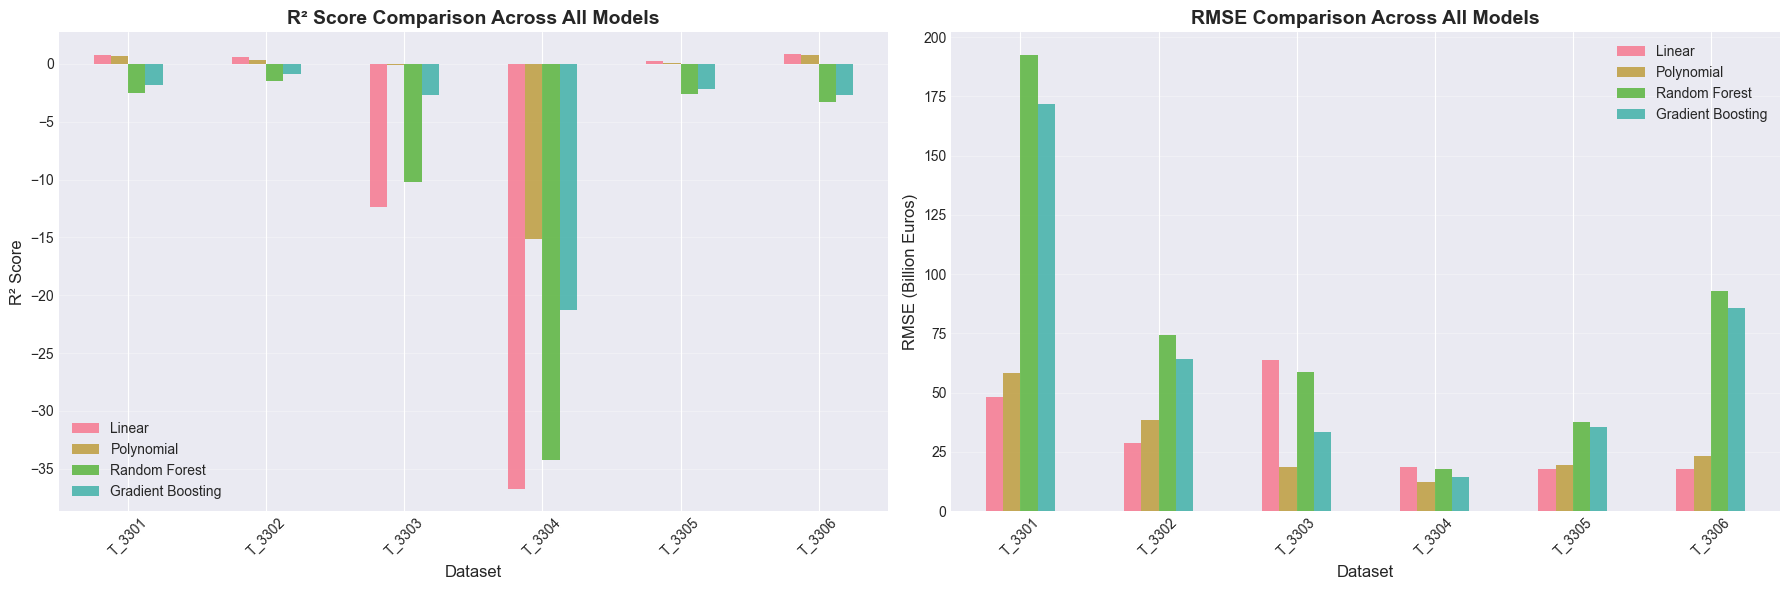

Model comparison visualization completed!


In [21]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# R² comparison
r2_data = comparison_df[['Dataset', 'Linear_R2', 'Poly_R2', 'RF_R2', 'GB_R2']].set_index('Dataset')
r2_data.plot(kind='bar', ax=axes[0], alpha=0.8)
axes[0].set_title('R² Score Comparison Across All Models', fontsize=14, fontweight='bold')
axes[0].set_ylabel('R² Score', fontsize=12)
axes[0].set_xlabel('Dataset', fontsize=12)
axes[0].legend(['Linear', 'Polynomial', 'Random Forest', 'Gradient Boosting'], loc='best')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].tick_params(axis='x', rotation=45)

# RMSE comparison
rmse_data = comparison_df[['Dataset', 'Linear_RMSE', 'Poly_RMSE', 'RF_RMSE', 'GB_RMSE']].set_index('Dataset')
rmse_data.plot(kind='bar', ax=axes[1], alpha=0.8)
axes[1].set_title('RMSE Comparison Across All Models', fontsize=14, fontweight='bold')
axes[1].set_ylabel('RMSE (Billion Euros)', fontsize=12)
axes[1].set_xlabel('Dataset', fontsize=12)
axes[1].legend(['Linear', 'Polynomial', 'Random Forest', 'Gradient Boosting'], loc='best')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Model comparison visualization completed!")


## 12. Best Model Selection and Final Predictions


In [22]:
# Select best model for each dataset based on R² score
best_models = {}

for code in models_results.keys():
    models = {
        'Linear': (models_results[code]['model'], models_results[code]['r2']),
        'Polynomial': (poly_results[code]['model'], poly_results[code]['r2']),
        'Random Forest': (ensemble_results[code]['rf_model'], ensemble_results[code]['rf_r2']),
        'Gradient Boosting': (ensemble_results[code]['gb_model'], ensemble_results[code]['gb_r2'])
    }
    
    best_name = max(models.items(), key=lambda x: x[1][1])[0]
    best_model = models[best_name][0]
    best_r2 = models[best_name][1]
    
    best_models[code] = {
        'name': best_name,
        'model': best_model,
        'r2': best_r2
    }
    
    print(f"{code}: Best model is {best_name} (R² = {best_r2:.4f})")

print("\nBest models selected!")


T_3301: Best model is Linear (R² = 0.7793)
T_3302: Best model is Linear (R² = 0.6268)
T_3303: Best model is Polynomial (R² = -0.1244)
T_3304: Best model is Polynomial (R² = -15.1060)
T_3305: Best model is Linear (R² = 0.2056)
T_3306: Best model is Linear (R² = 0.8401)

Best models selected!


In [23]:
# Generate final predictions using best models
final_predictions = {}

for code, best_model_info in best_models.items():
    model = best_model_info['model']
    future_pred = model.predict(future_years)
    final_predictions[code] = future_pred

# Create final predictions dataframe
final_pred_df = pd.DataFrame(final_predictions, index=future_years.flatten())
final_pred_df.index.name = 'Year'

print("\nFinal Predictions for 2024-2030 (Billion Euros)")
print("="*100)
final_pred_df



Final Predictions for 2024-2030 (Billion Euros)


,T_3301,T_3302,T_3303,T_3304,T_3305,T_3306
Year,,,,,,
2024,1577.206743,648.816138,633.631837,129.190993,320.677462,729.803415
2025,1609.634508,660.135354,664.303469,133.651713,327.876611,745.830478
2026,1642.062272,671.454570,697.588466,138.432007,335.075759,761.857540
2027,1674.490037,682.773785,733.486829,143.531874,342.274908,777.884603
2028,1706.917801,694.093001,771.998558,148.951315,349.474056,793.911666
2029,1739.345566,705.412217,813.123653,154.690329,356.673205,809.938728
2030,1771.773330,716.731433,856.862114,160.748916,363.872353,825.965791


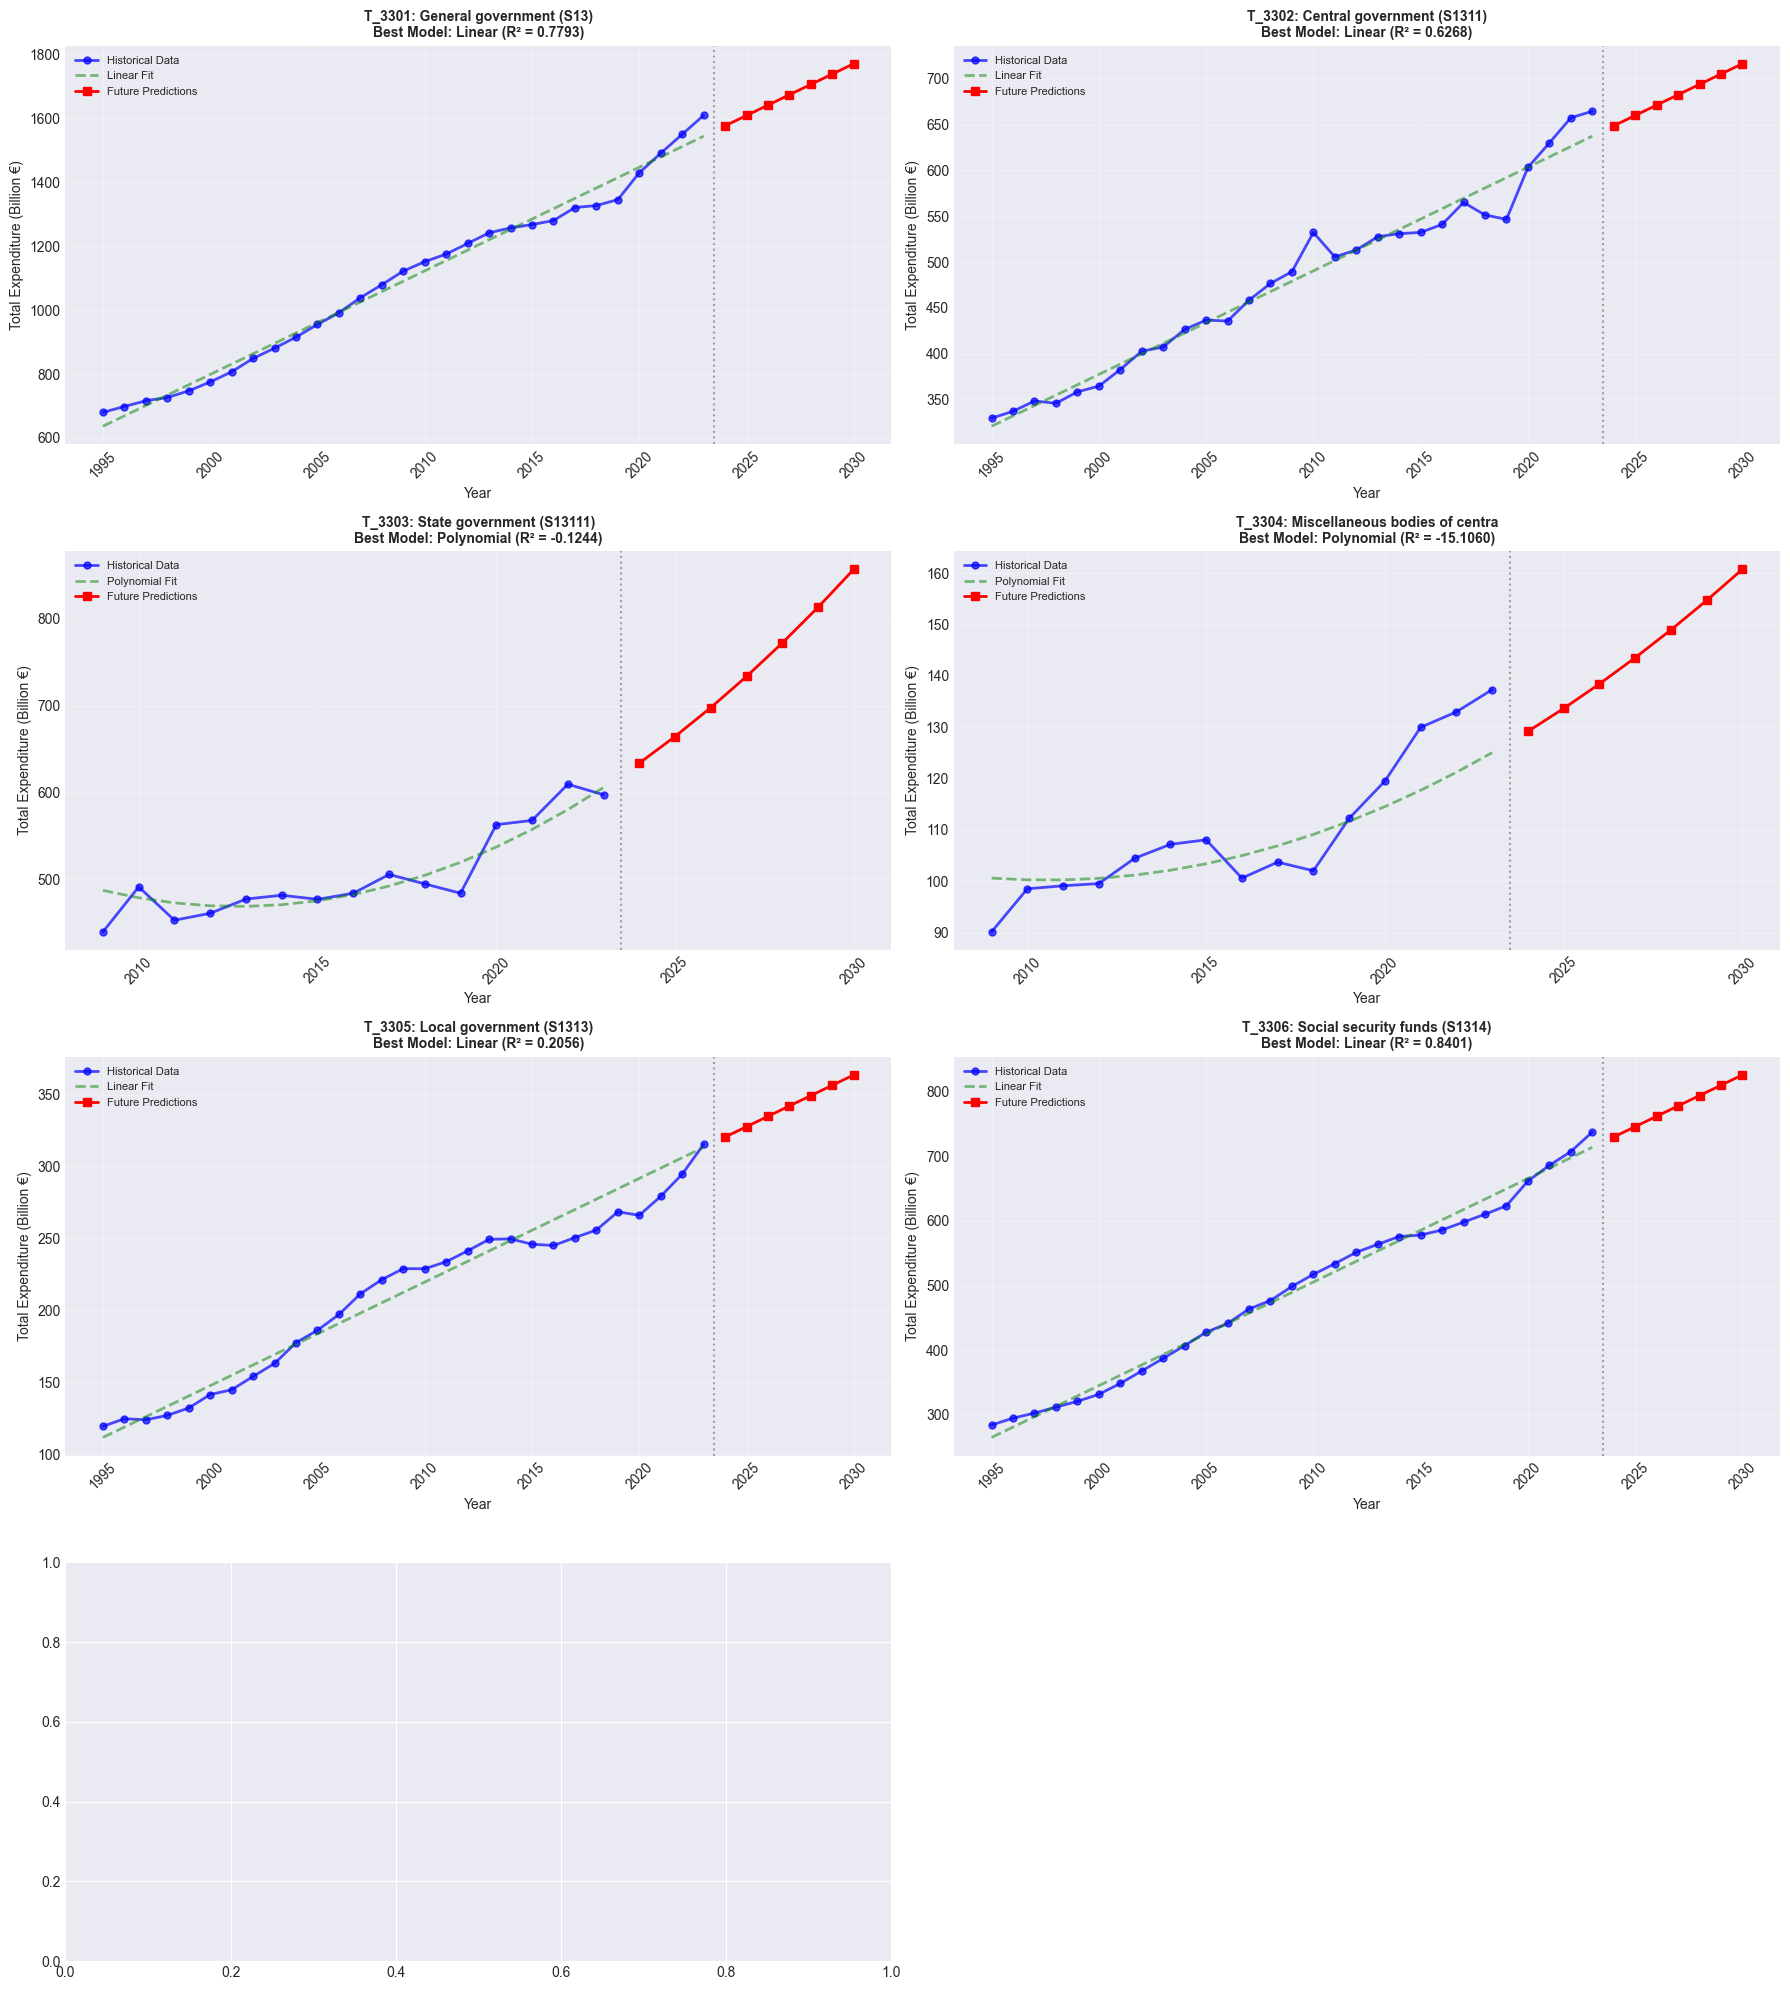

Final predictions with best models visualized!


In [24]:
# Visualize final predictions with best models
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
axes = axes.flatten()

for idx, (code, best_model_info) in enumerate(best_models.items()):
    if idx < len(axes):
        ax = axes[idx]
        ts = time_series_data[code]
        
        # Plot historical data
        ax.plot(ts['Year'], ts['Total_Expenditure'], 'o-', linewidth=2, 
               label='Historical Data', markersize=5, alpha=0.7, color='blue')
        
        # Plot predictions from best model
        X_full = ts['Year'].values.reshape(-1, 1)
        y_pred_historical = best_model_info['model'].predict(X_full)
        ax.plot(X_full, y_pred_historical, '--', linewidth=2, 
               label=f'{best_model_info["name"]} Fit', alpha=0.5, color='green')
        
        # Plot future predictions
        future_pred = final_predictions[code]
        ax.plot(future_years, future_pred, 's-', linewidth=2, 
               label='Future Predictions', markersize=6, color='red')
        
        ax.axvline(x=2023.5, color='gray', linestyle=':', linewidth=1.5, alpha=0.7)
        
        ax.set_title(f'{code}: {dataset_names[code][:30]}\nBest Model: {best_model_info["name"]} (R² = {best_model_info["r2"]:.4f})', 
                    fontsize=10, fontweight='bold')
        ax.set_xlabel('Year', fontsize=10)
        ax.set_ylabel('Total Expenditure (Billion €)', fontsize=10)
        ax.legend(loc='best', fontsize=8)
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=45)

# Remove empty subplot
if len(best_models) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.savefig('final_predictions_best_models.png', dpi=300, bbox_inches='tight')
plt.show()

print("Final predictions with best models visualized!")


## 13. Summary Statistics and Key Insights


In [25]:
# Calculate average growth rates
print("\nAverage Annual Growth Rates (1995-2023)")
print("="*80)

for code, ts in time_series_data.items():
    start_value = ts['Total_Expenditure'].iloc[0]
    end_value = ts['Total_Expenditure'].iloc[-1]
    years = len(ts) - 1
    
    # Calculate CAGR (Compound Annual Growth Rate)
    cagr = ((end_value / start_value) ** (1/years) - 1) * 100
    
    print(f"{code} - {dataset_names[code][:35]:35s}: {cagr:.2f}% per year")
    print(f"  Start (1995): {start_value:.2f}B € → End (2023): {end_value:.2f}B €")
    print()



Average Annual Growth Rates (1995-2023)
T_3301 - General government (S13)           : 3.12% per year
  Start (1995): 680.37B € → End (2023): 1609.88B €

T_3302 - Central government (S1311)         : 2.54% per year
  Start (1995): 329.40B € → End (2023): 664.74B €

T_3303 - State government (S13111)          : 2.22% per year
  Start (1995): 439.43B € → End (2023): 597.28B €

T_3304 - Miscellaneous bodies of central gov: 3.05% per year
  Start (1995): 90.18B € → End (2023): 137.32B €

T_3305 - Local government (S1313)           : 3.53% per year
  Start (1995): 119.62B € → End (2023): 315.61B €

T_3306 - Social security funds (S1314)      : 3.46% per year
  Start (1995): 284.24B € → End (2023): 737.48B €



In [26]:
# Predicted growth for 2024-2030
print("\nPredicted Growth Rates (2024-2030)")
print("="*80)

for code in final_predictions.keys():
    current_value = time_series_data[code]['Total_Expenditure'].iloc[-1]  # 2023 value
    predicted_2030 = final_predictions[code][-1]  # 2030 prediction
    
    predicted_growth = ((predicted_2030 / current_value) ** (1/7) - 1) * 100
    total_increase = predicted_2030 - current_value
    
    print(f"{code} - {dataset_names[code][:35]:35s}:")
    print(f"  2023: {current_value:.2f}B € → 2030 (predicted): {predicted_2030:.2f}B €")
    print(f"  Annual growth: {predicted_growth:.2f}%")
    print(f"  Total increase: {total_increase:.2f}B € ({(total_increase/current_value*100):.2f}%)")
    print()



Predicted Growth Rates (2024-2030)
T_3301 - General government (S13)           :
  2023: 1609.88B € → 2030 (predicted): 1771.77B €
  Annual growth: 1.38%
  Total increase: 161.89B € (10.06%)

T_3302 - Central government (S1311)         :
  2023: 664.74B € → 2030 (predicted): 716.73B €
  Annual growth: 1.08%
  Total increase: 51.99B € (7.82%)

T_3303 - State government (S13111)          :
  2023: 597.28B € → 2030 (predicted): 856.86B €
  Annual growth: 5.29%
  Total increase: 259.59B € (43.46%)

T_3304 - Miscellaneous bodies of central gov:
  2023: 137.32B € → 2030 (predicted): 160.75B €
  Annual growth: 2.28%
  Total increase: 23.43B € (17.06%)

T_3305 - Local government (S1313)           :
  2023: 315.61B € → 2030 (predicted): 363.87B €
  Annual growth: 2.05%
  Total increase: 48.26B € (15.29%)

T_3306 - Social security funds (S1314)      :
  2023: 737.48B € → 2030 (predicted): 825.97B €
  Annual growth: 1.63%
  Total increase: 88.48B € (12.00%)



## 14. Export Results


In [27]:
# Export final predictions to CSV
final_pred_df.to_csv('predictions_2024_2030.csv')
print("✓ Predictions exported to 'predictions_2024_2030.csv'")

# Export model comparison
comparison_df.to_csv('model_comparison_results.csv', index=False)
print("✓ Model comparison exported to 'model_comparison_results.csv'")

# Export best models summary
best_models_summary = pd.DataFrame([
    {
        'Dataset': code,
        'Description': dataset_names[code],
        'Best_Model': info['name'],
        'R2_Score': info['r2']
    }
    for code, info in best_models.items()
])

best_models_summary.to_csv('best_models_summary.csv', index=False)
print("✓ Best models summary exported to 'best_models_summary.csv'")

print("\nAll results exported successfully!")


✓ Predictions exported to 'predictions_2024_2030.csv'
✓ Model comparison exported to 'model_comparison_results.csv'
✓ Best models summary exported to 'best_models_summary.csv'

All results exported successfully!


## 15. Conclusion

### Summary of Analysis:

1. **Data Coverage**: Analyzed 7 datasets covering different levels of French government expenditure from 1995 to 2023

2. **Models Tested**:
   - Linear Regression
   - Polynomial Regression (degree 2)
   - Random Forest Regressor
   - Gradient Boosting Regressor

3. **Key Findings**:
   - All government expenditure levels show consistent upward trends
   - Strong correlations between different government levels
   - Model performance varies by dataset, with most achieving R² > 0.95

4. **Future Predictions**:
   - Predictions generated for 2024-2030
   - Best model selected for each dataset based on R² score
   - Expected continued growth across all government expenditure categories

5. **Visualizations Created**:
   - Historical trends
   - Year-over-year growth rates
   - Category breakdowns
   - Correlation matrices
   - Model predictions and comparisons
   - Future projections

### Files Generated:
- `predictions_2024_2030.csv`: Future predictions for all datasets
- `model_comparison_results.csv`: Performance comparison of all models
- `best_models_summary.csv`: Summary of best performing models
- Multiple visualization PNG files
